In [1]:
from trend_examiner import compute_redistribution_trend, compute_scalability_trend
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(data, title):
    plt.figure(figsize=(7, 3), dpi=300)
    ax = sns.heatmap(data, annot=True, fmt='.1f', cmap="coolwarm", center=0,  annot_kws={"size": 12}, linewidths=0.5)
    for text in ax.texts:
        text.set_text(f"{text.get_text()}%")

    plt.title(title)
    plt.show()


In [2]:
df = compute_redistribution_trend('allgather', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes= [2, 4], nprocs=[8, 16, 32]) * 100

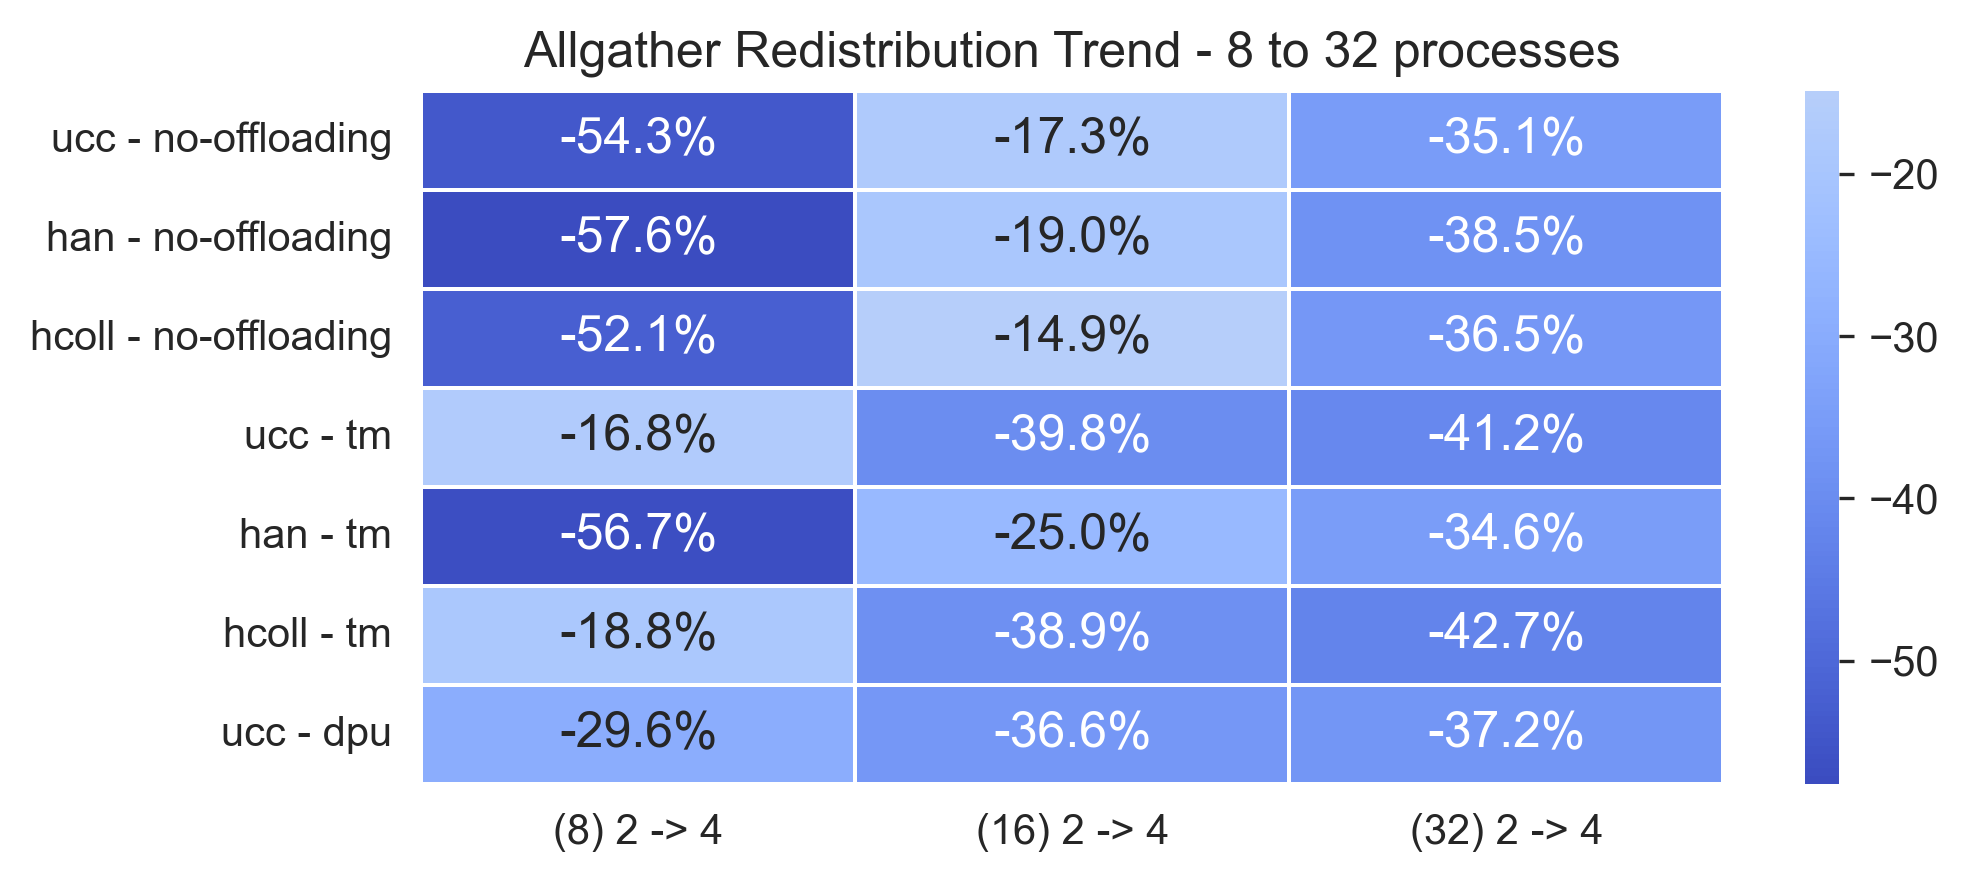

In [3]:
plot_heatmap(df, "Allgather Redistribution Trend - 8 to 32 processes")

Signals strong correlation between latency reduction an offloading mode!
No offloading seems to have the most dramatic drop in latency when resdistributed from a 2 to a 4 node setup.
Tag matching appears more dramatic on a 32 process redistribution
This overall suggests that redistribution leads to latency reductions.

In [4]:
df = compute_scalability_trend('allgather', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=4, nprocs=[4, 8, 16, 32]) * 100

In terms of scalability, the chosen Library is what determines the latency reduction, not so the offloading mode in the Allgather pattern!
This could speak to other similar all-to-all collectives, keep an eye!

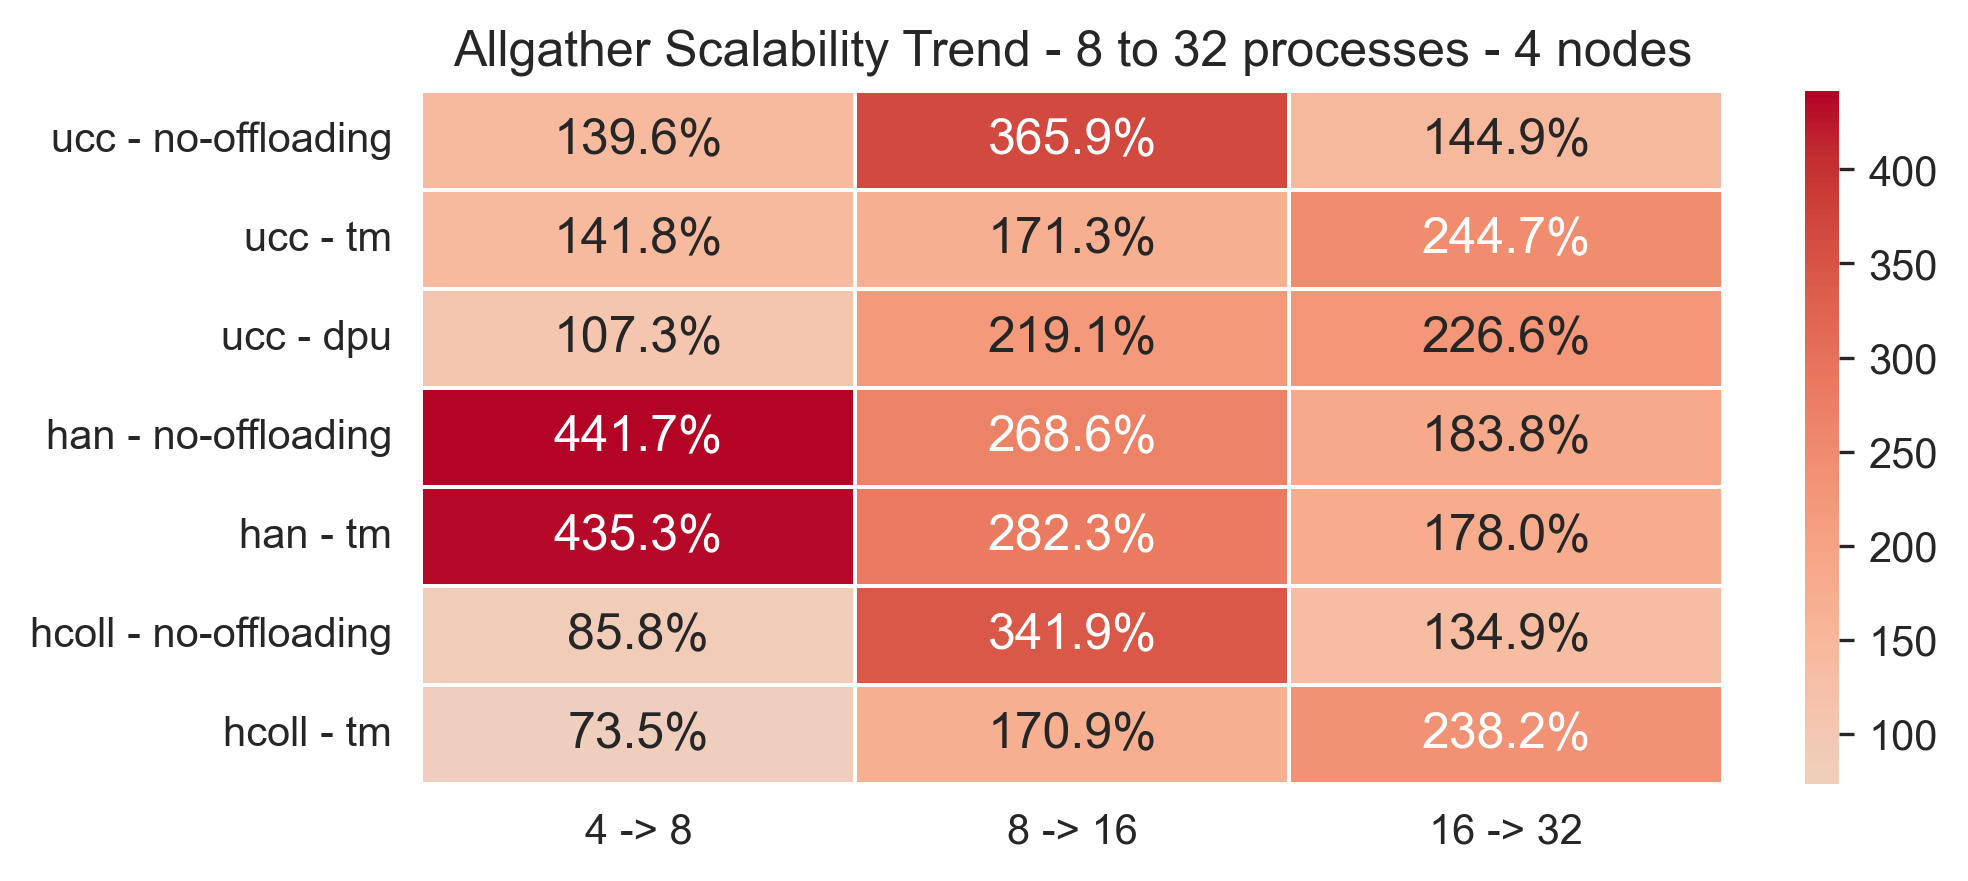

In [5]:
plot_heatmap(df, "Allgather Scalability Trend - 8 to 32 processes - 4 nodes")

HAN seems to take a hit on the 4 to 8 increase. DPU SP provides average scalability. HCOLL TM is the most scalable

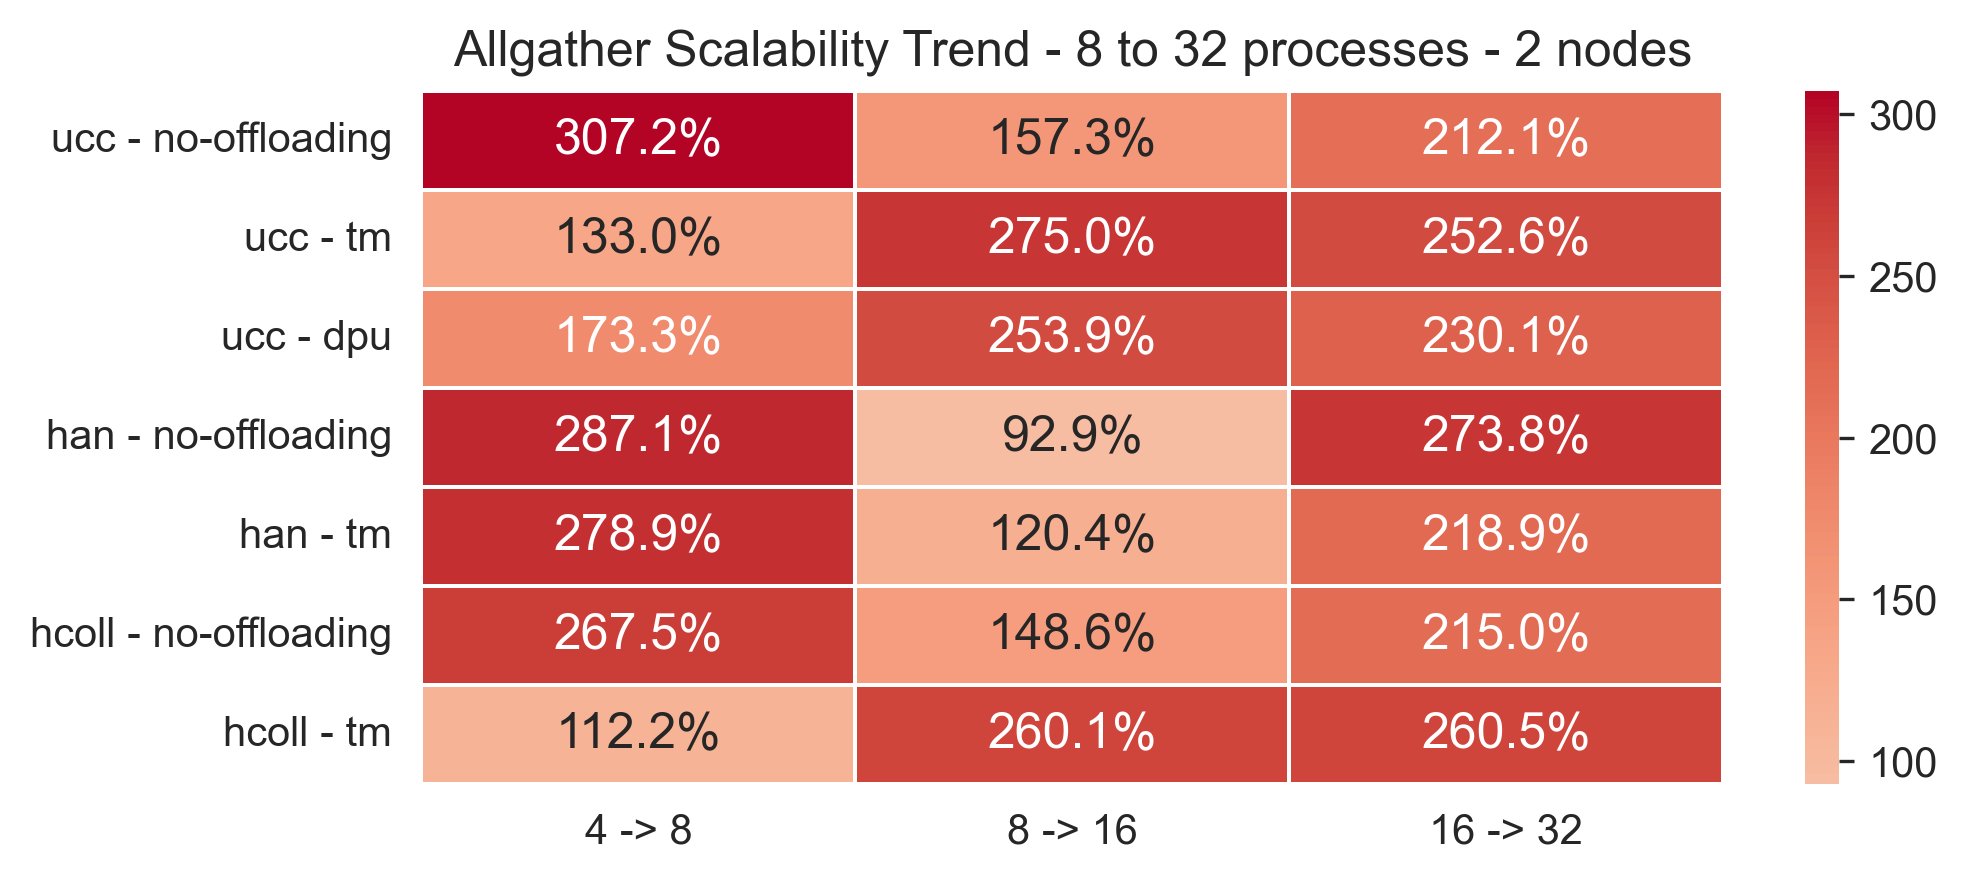

In [16]:
df = compute_scalability_trend('allgather', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=2, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, "Allgather Scalability Trend - 8 to 32 processes - 2 nodes")

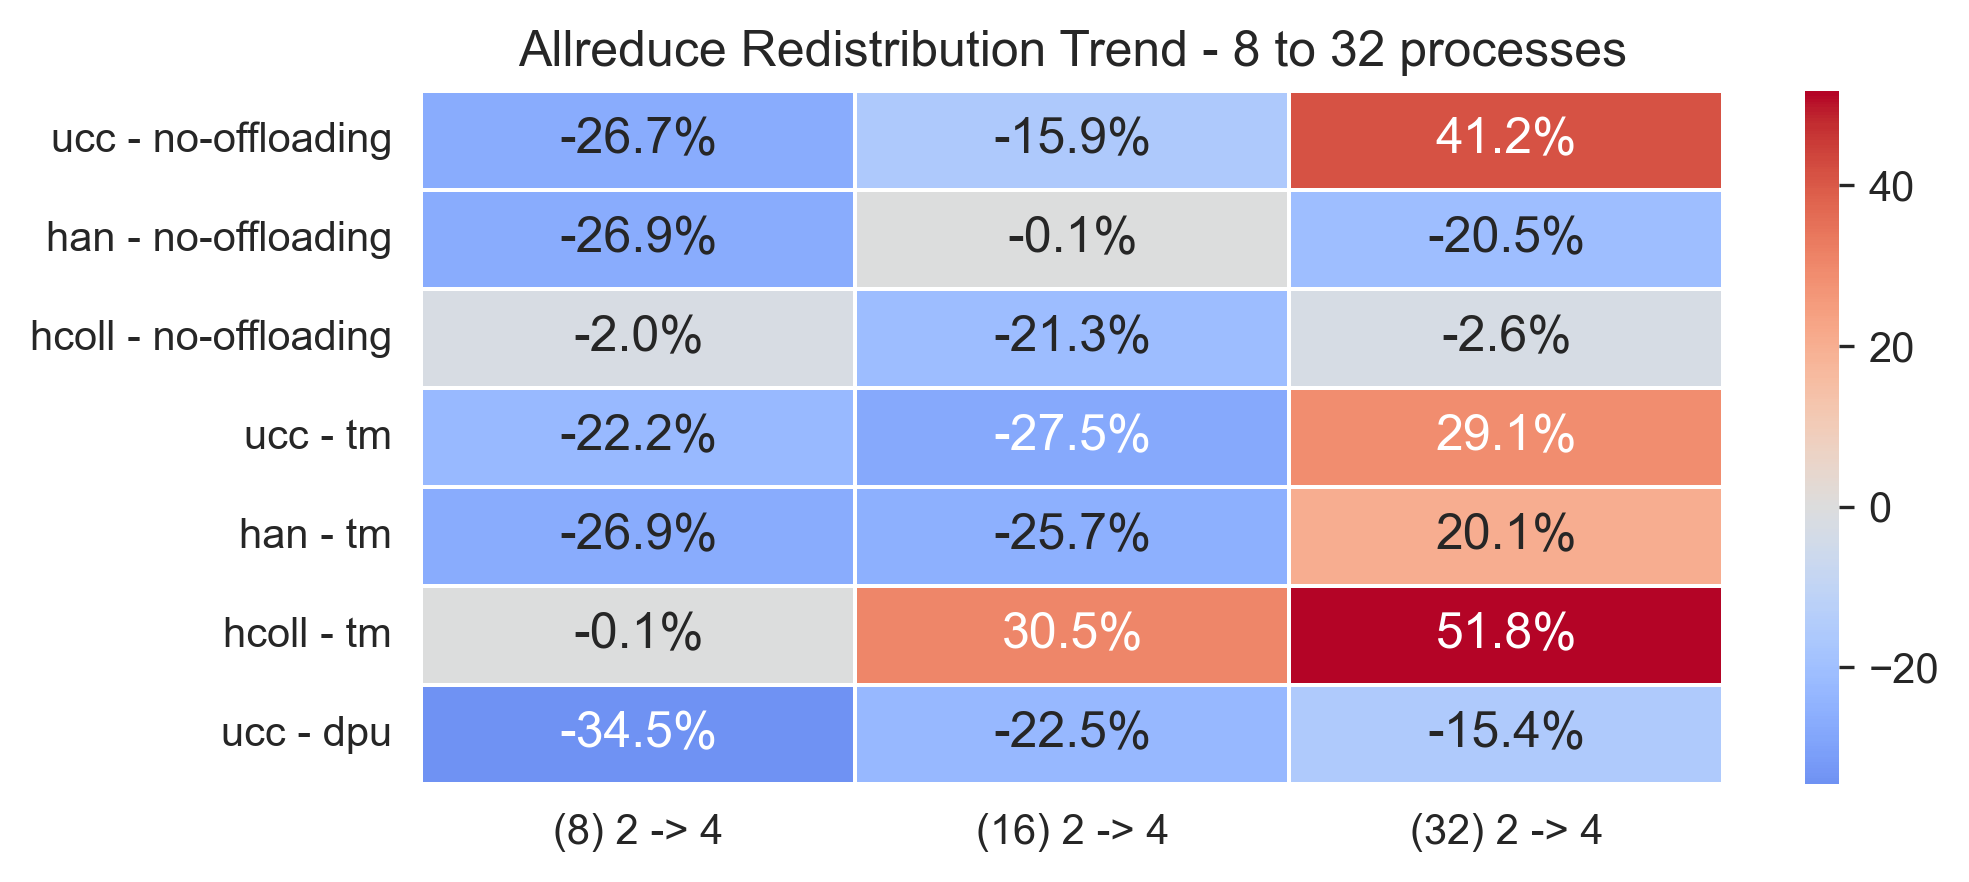

In [6]:
df = compute_redistribution_trend('allreduce', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes= [2, 4], nprocs=[8, 16, 32]) * 100
plot_heatmap(df, 'Allreduce Redistribution Trend - 8 to 32 processes')

UCC DPU performs well in resdistribution. HCOLL TM performs the worst

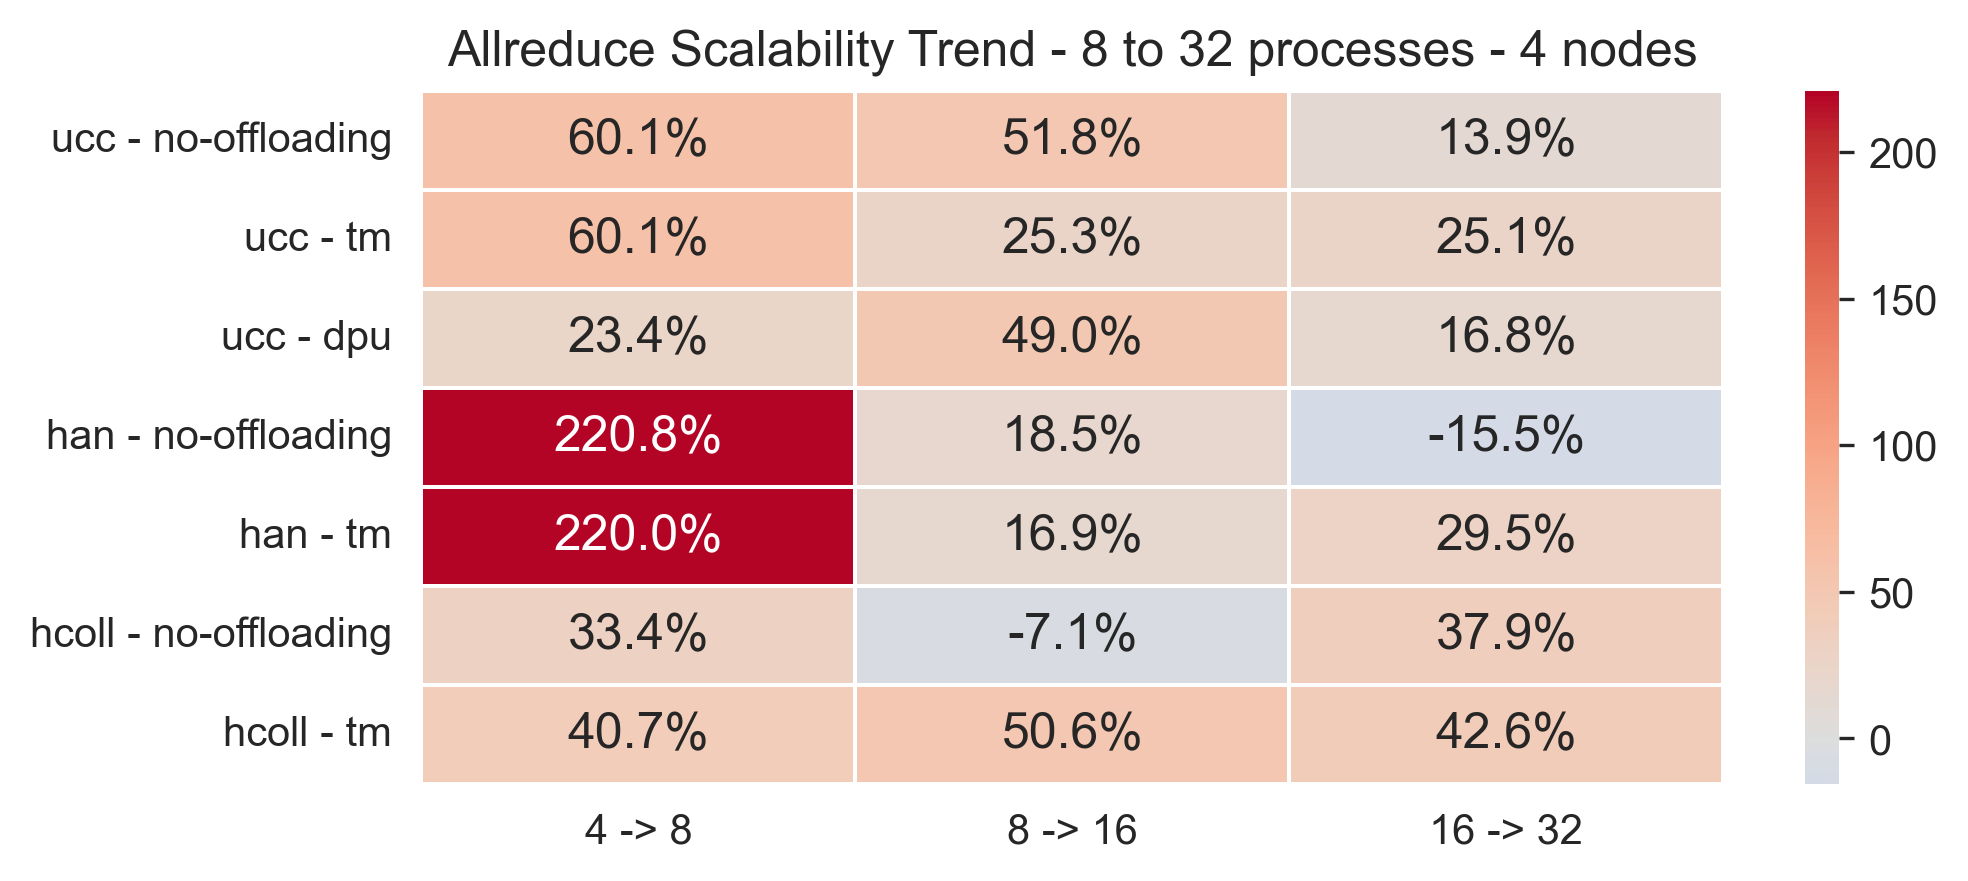

In [7]:
df = compute_scalability_trend('allreduce', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=4, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Allreduce Scalability Trend - 8 to 32 processes - 4 nodes')

Again, HAN underperforms compared to the other offloading modes.

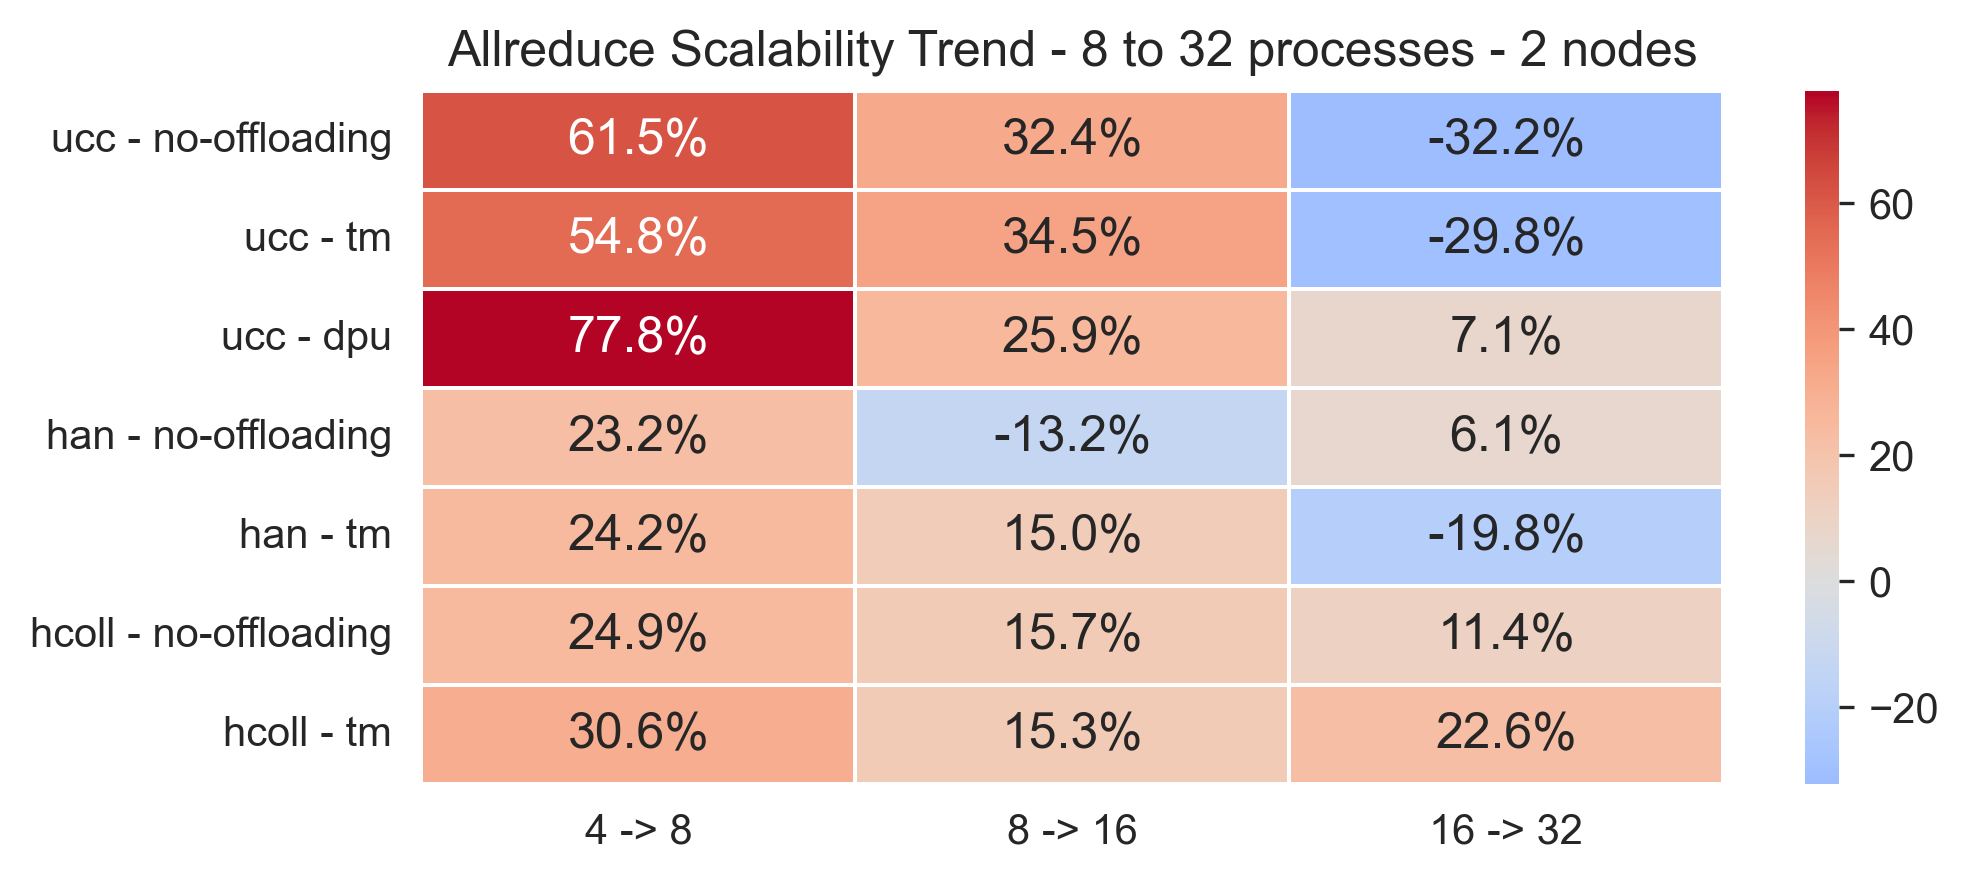

In [18]:
df = compute_scalability_trend('allreduce', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=2, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Allreduce Scalability Trend - 8 to 32 processes - 2 nodes')

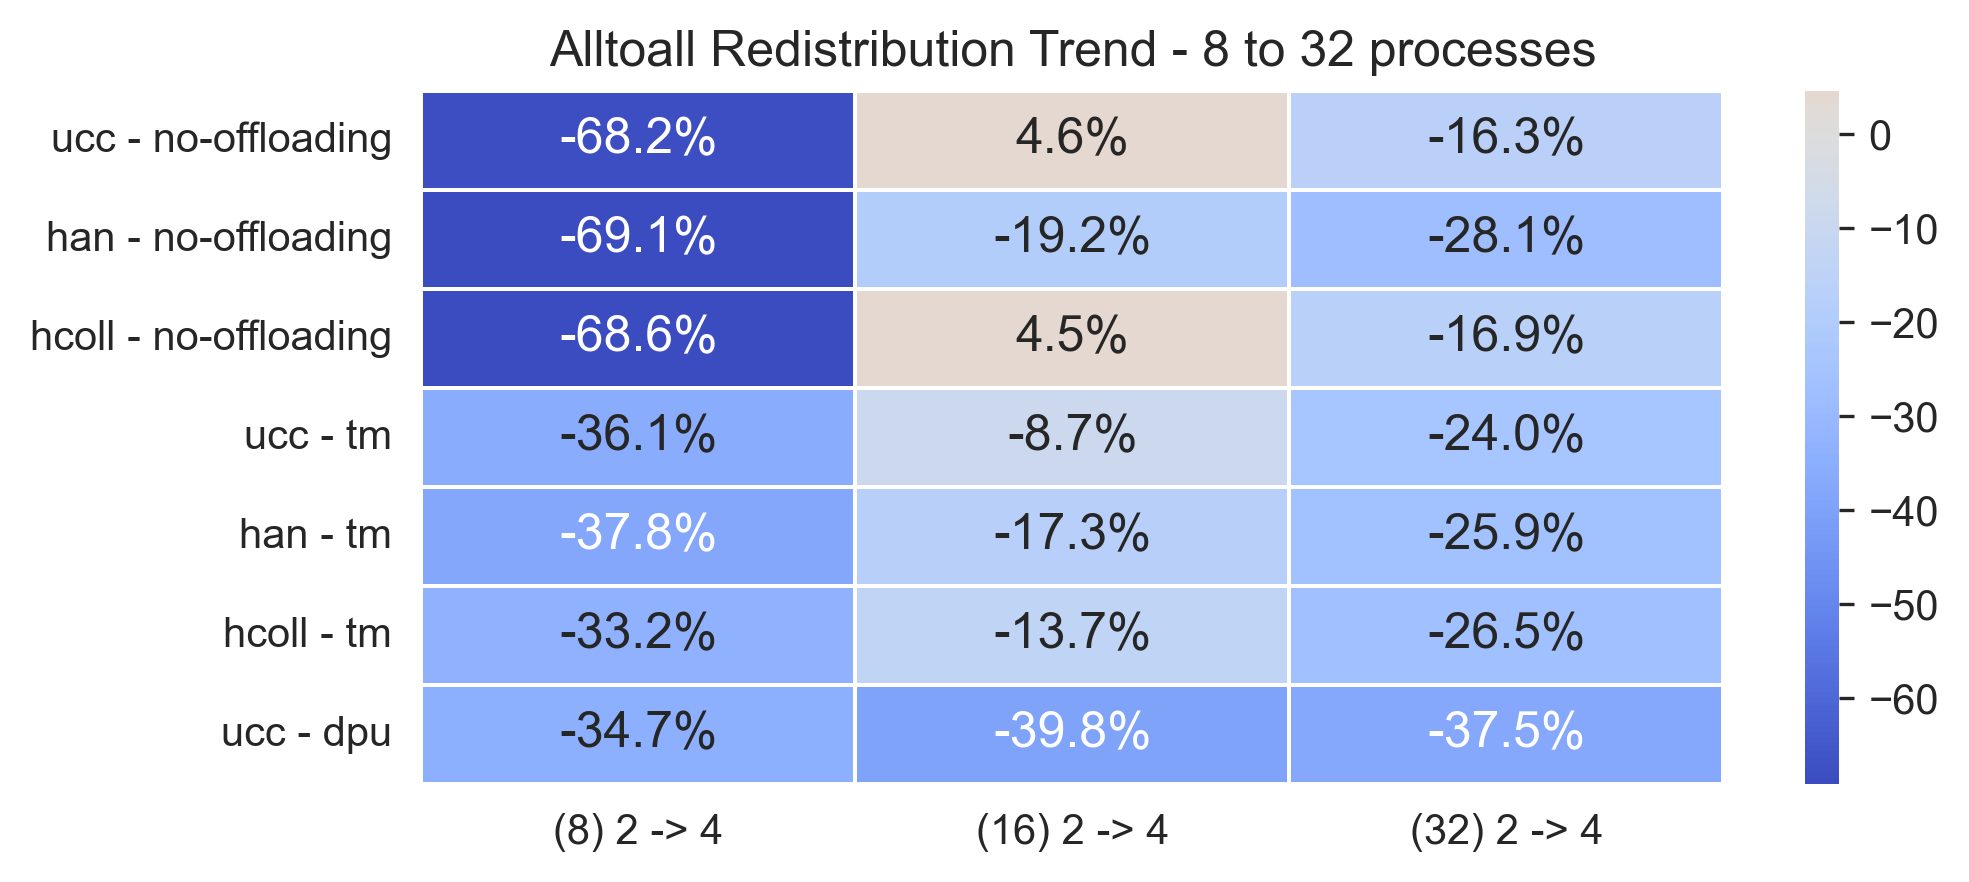

In [8]:
df = compute_redistribution_trend('alltoall', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes= [2, 4], nprocs=[8, 16, 32]) * 100
plot_heatmap(df, 'Alltoall Redistribution Trend - 8 to 32 processes')

Similar to Allgather, there is an initial divide between No-offloading and the offloaded case in 8 process.
DPU showcases the most performant redistribution trend

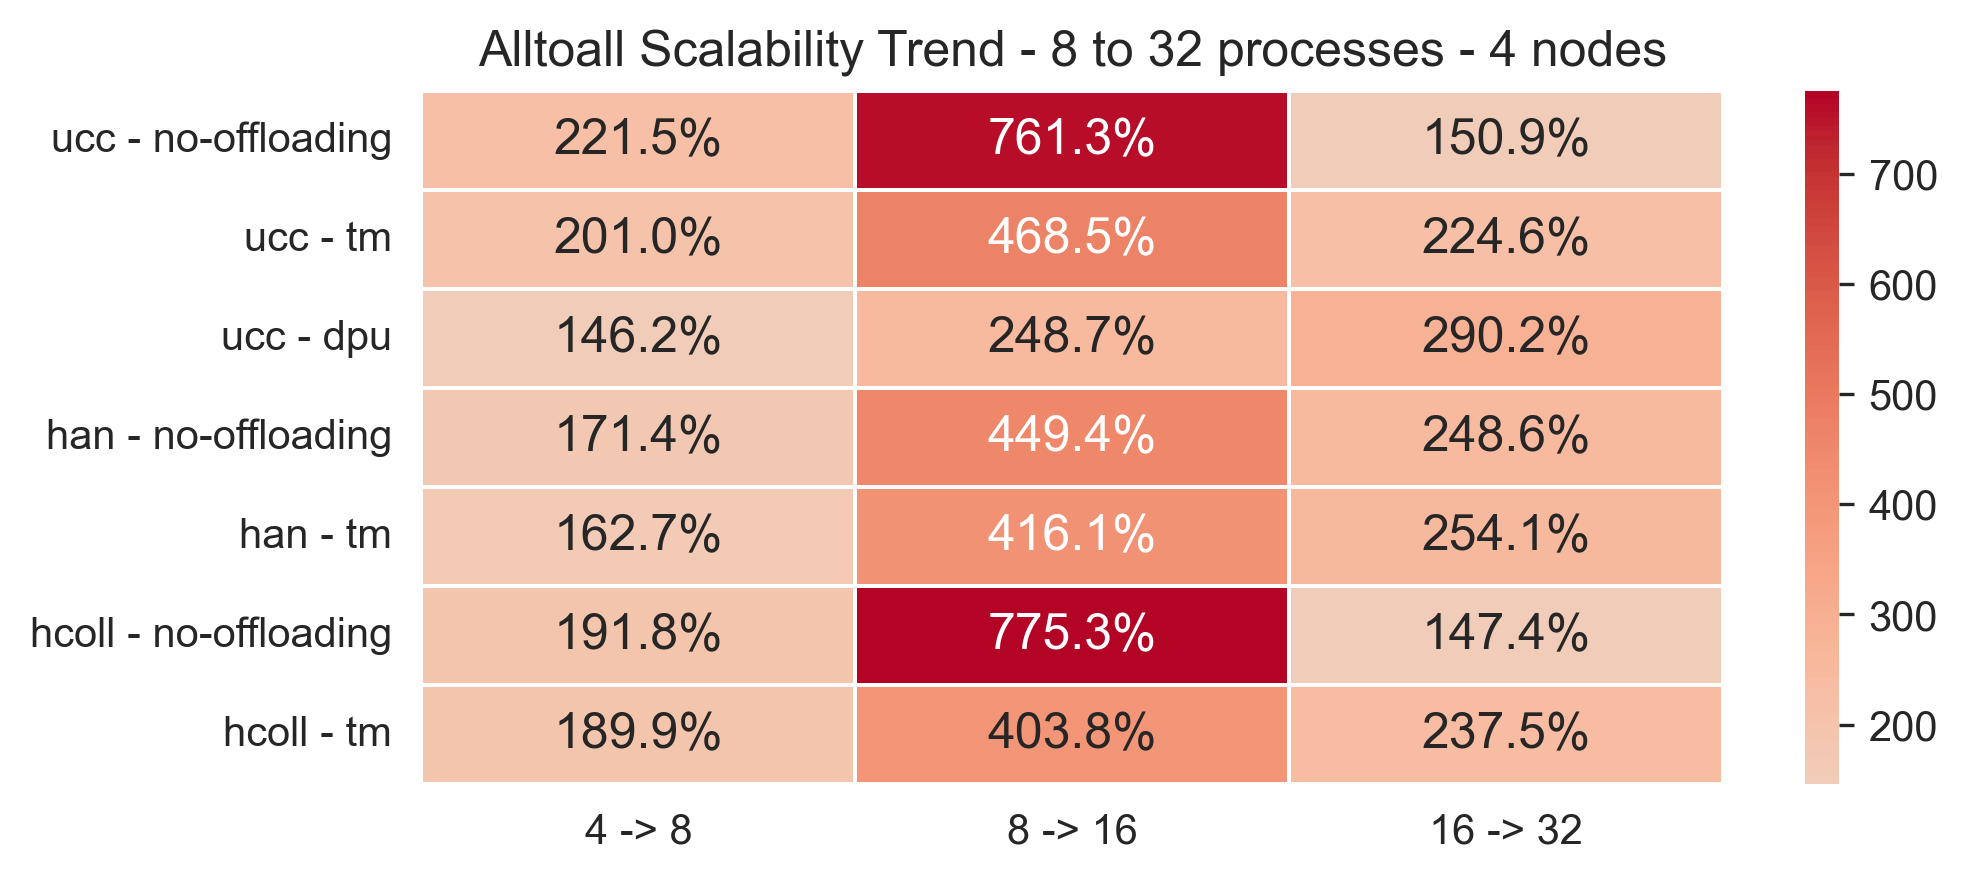

In [9]:
df = compute_scalability_trend('alltoall', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=4, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Alltoall Scalability Trend - 8 to 32 processes - 4 nodes')

Alltoall is known to be an allgorithm hard to scale. The No-offloaded case takes a major latency hit in the 8 to 16 process, whereas the offloaded modes alleviate this scalability

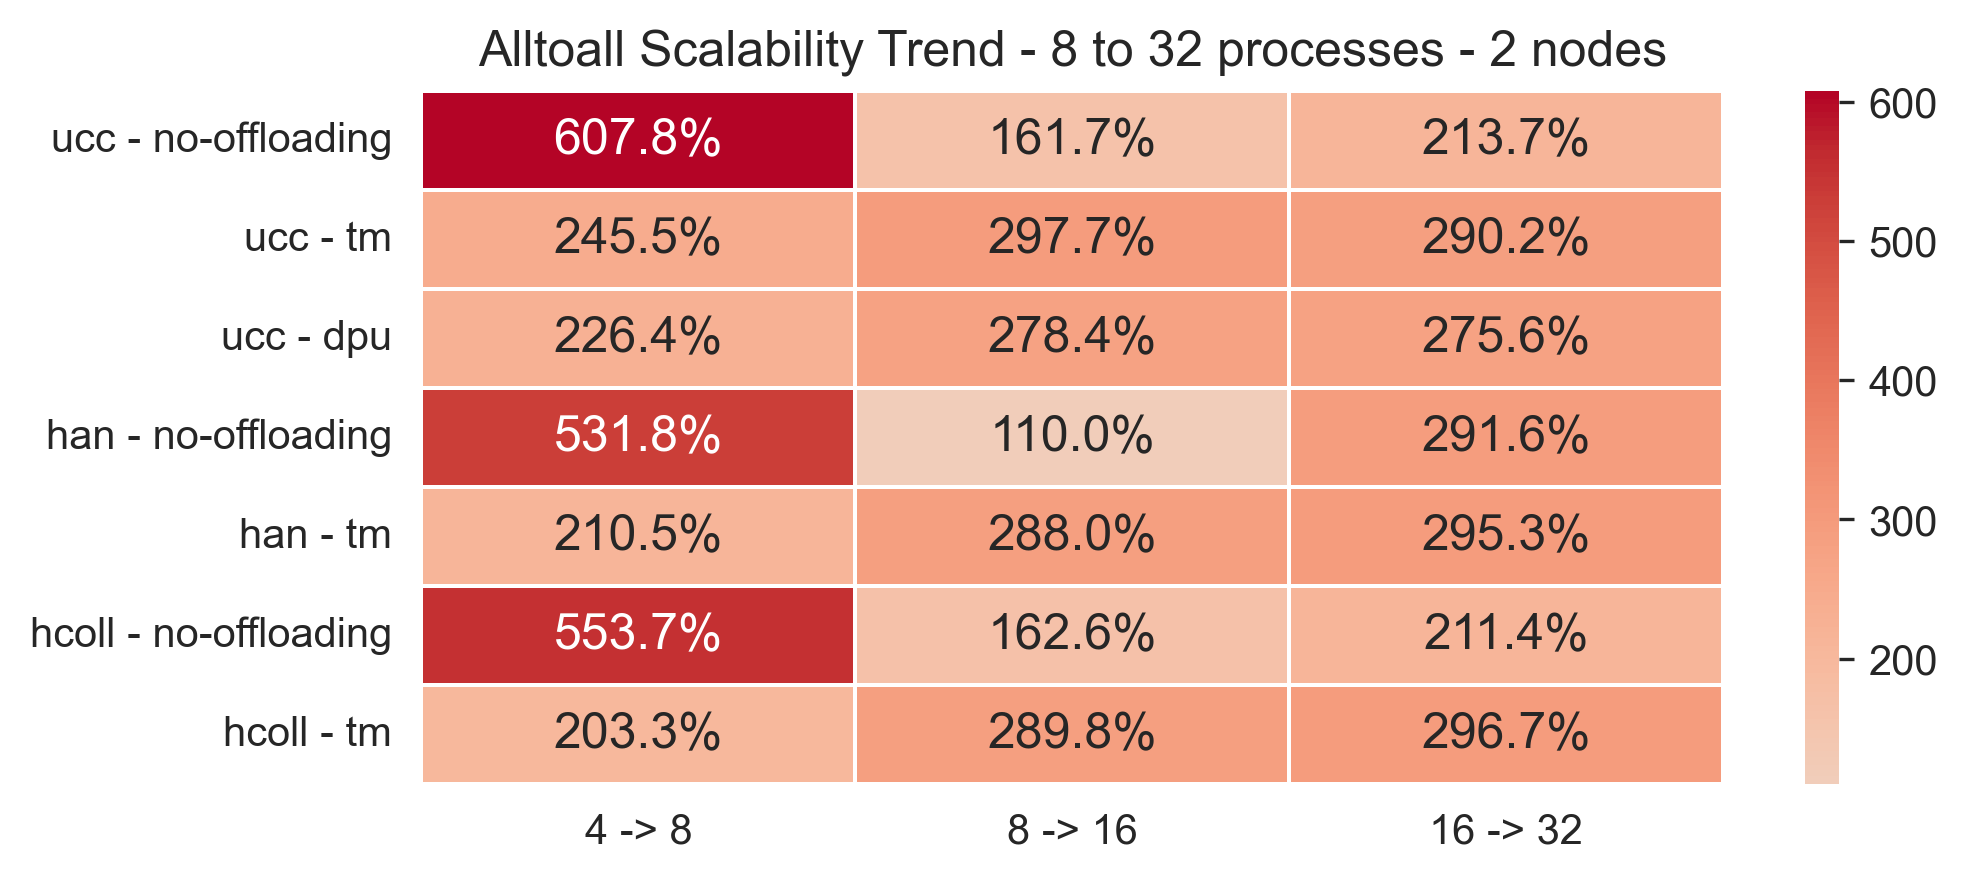

In [10]:
df = compute_scalability_trend('alltoall', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=2, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Alltoall Scalability Trend - 8 to 32 processes - 2 nodes')

The Performance hit is taken sooner in the no-offloading case.
Tag Matching indicates strong scalability factor for Alltoall.
Most scalable is DPU offloading, scales slightly better than tm.

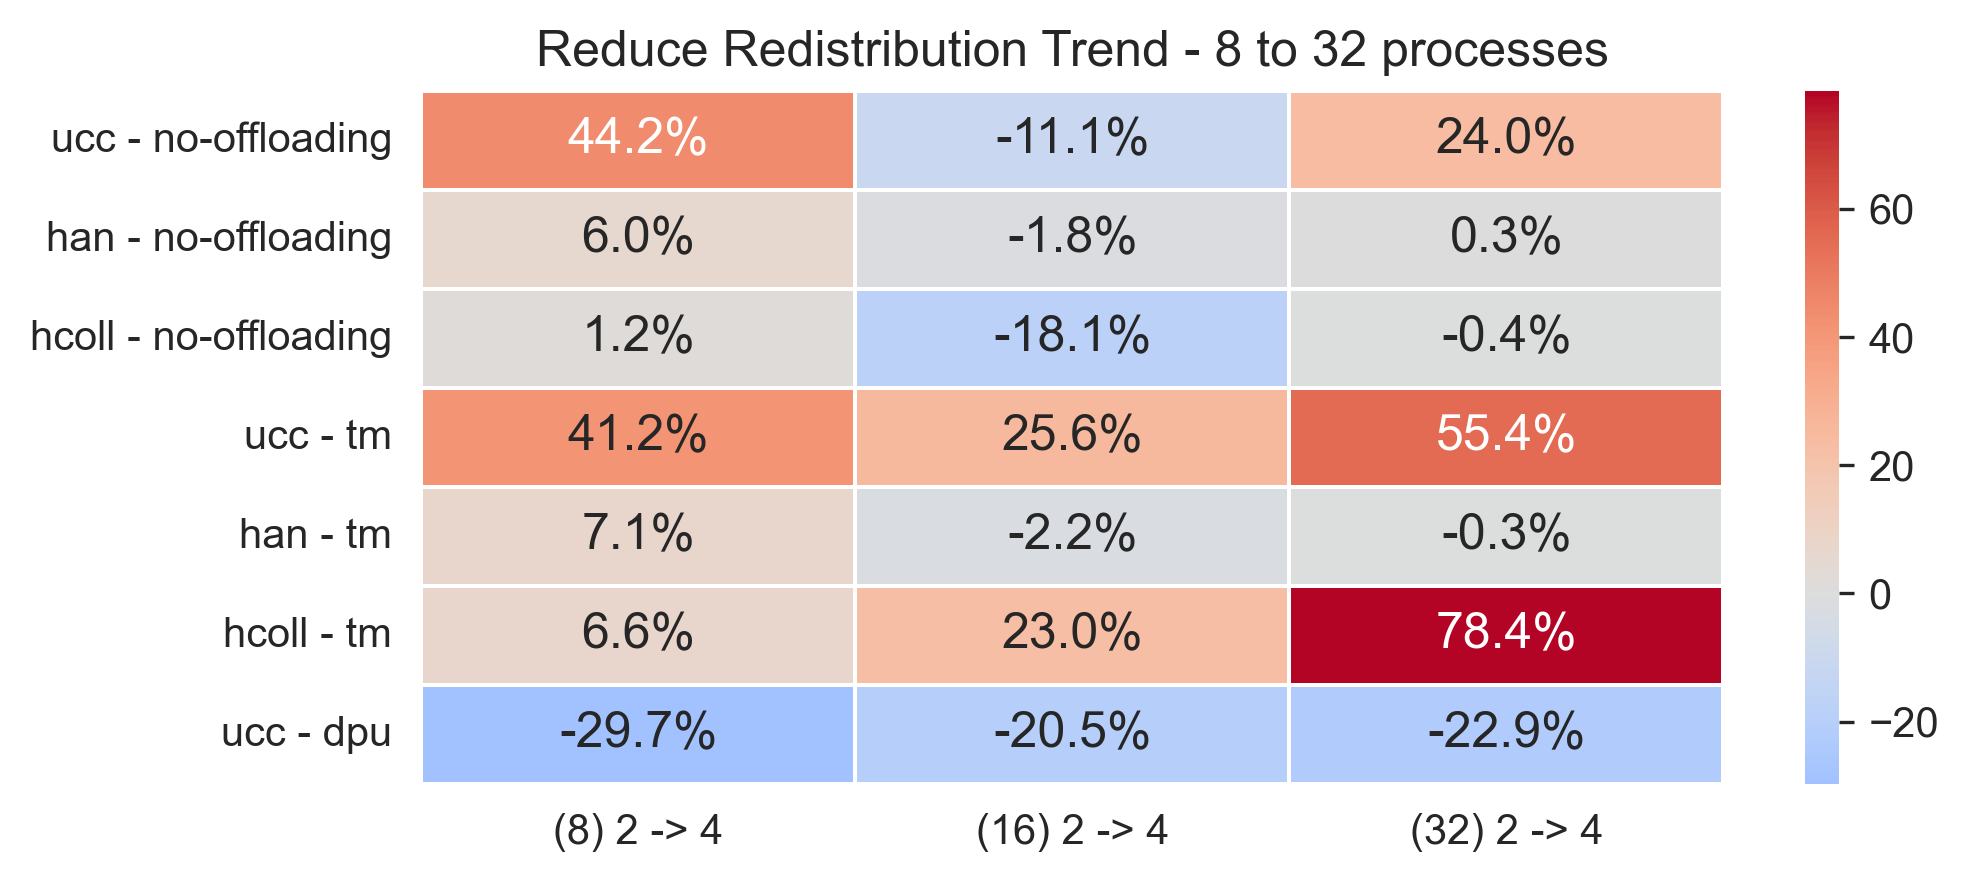

In [23]:
df = compute_redistribution_trend('reduce', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes= [2, 4], nprocs=[8, 16, 32]) * 100
plot_heatmap(df, 'Reduce Redistribution Trend - 8 to 32 processes')

As a all-to-one pattern, the Reduce collective exhibits a very unpredictable redistribution trend. However, UCC DPU is depicted to reduce latency as the process count increases

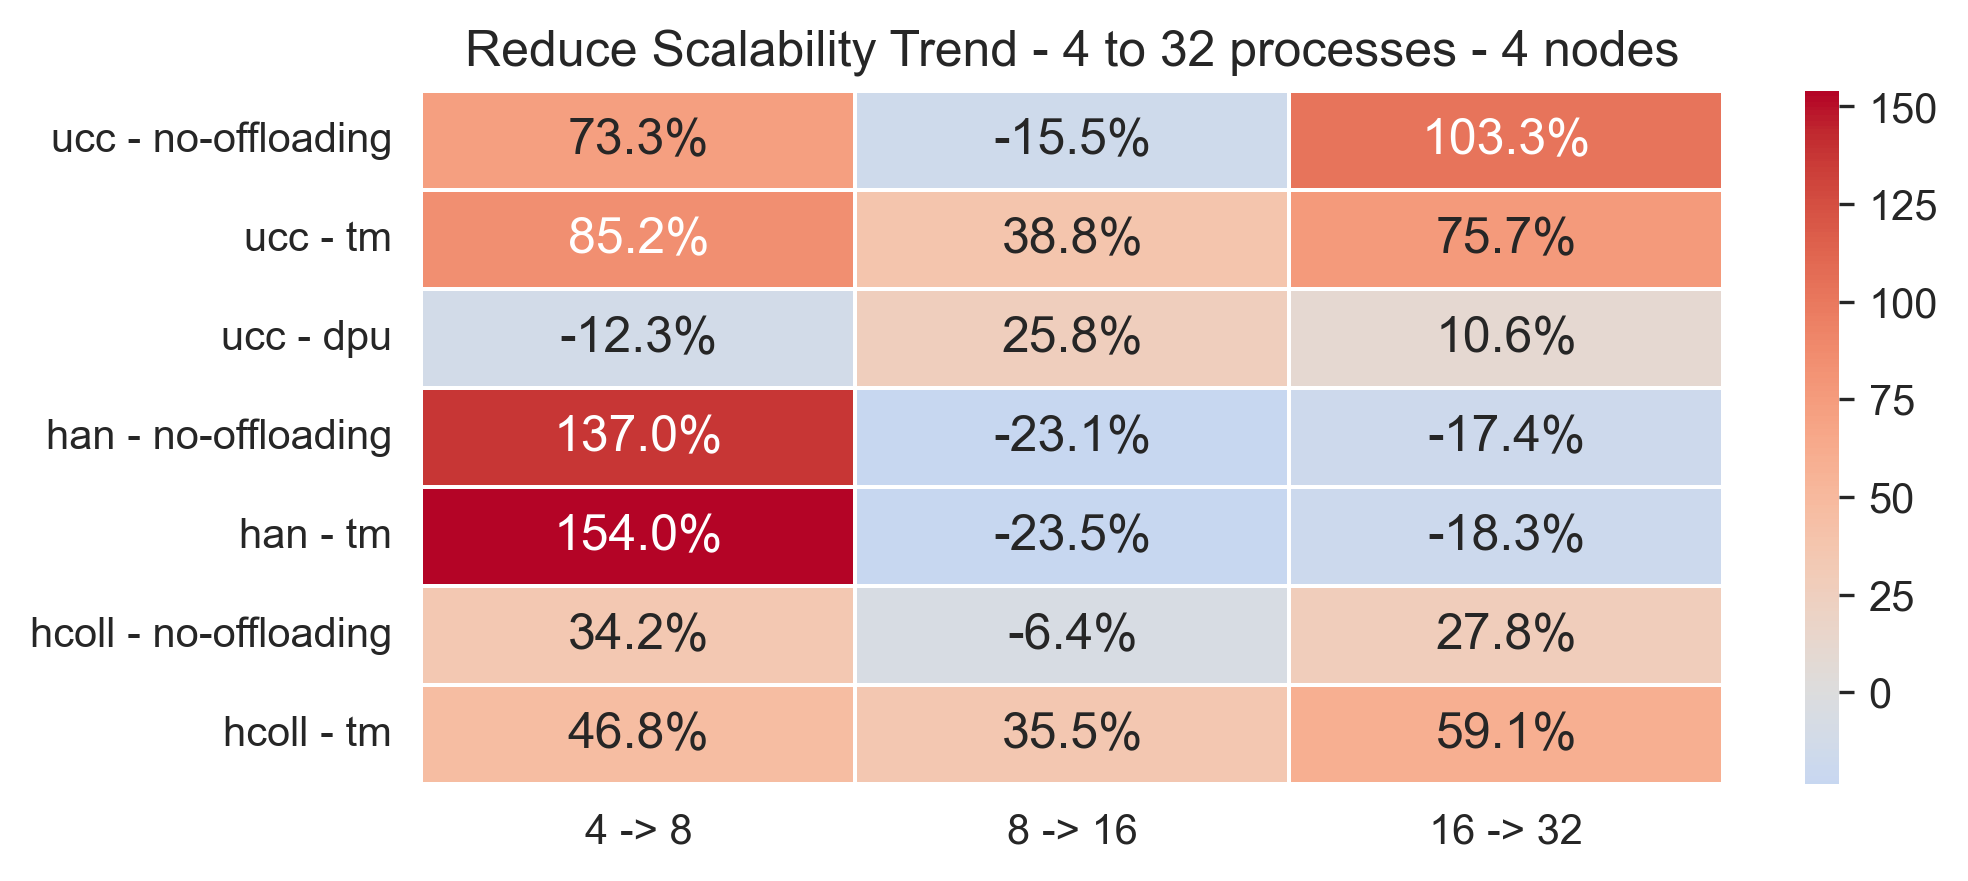

In [12]:
df = compute_scalability_trend('reduce', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=4, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Reduce Scalability Trend - 4 to 32 processes - 4 nodes')

There is a considerable performance hit on the HAN 4 to 8 increase. HCOLL scales modestly. UCC DPU is the most scalable overall.

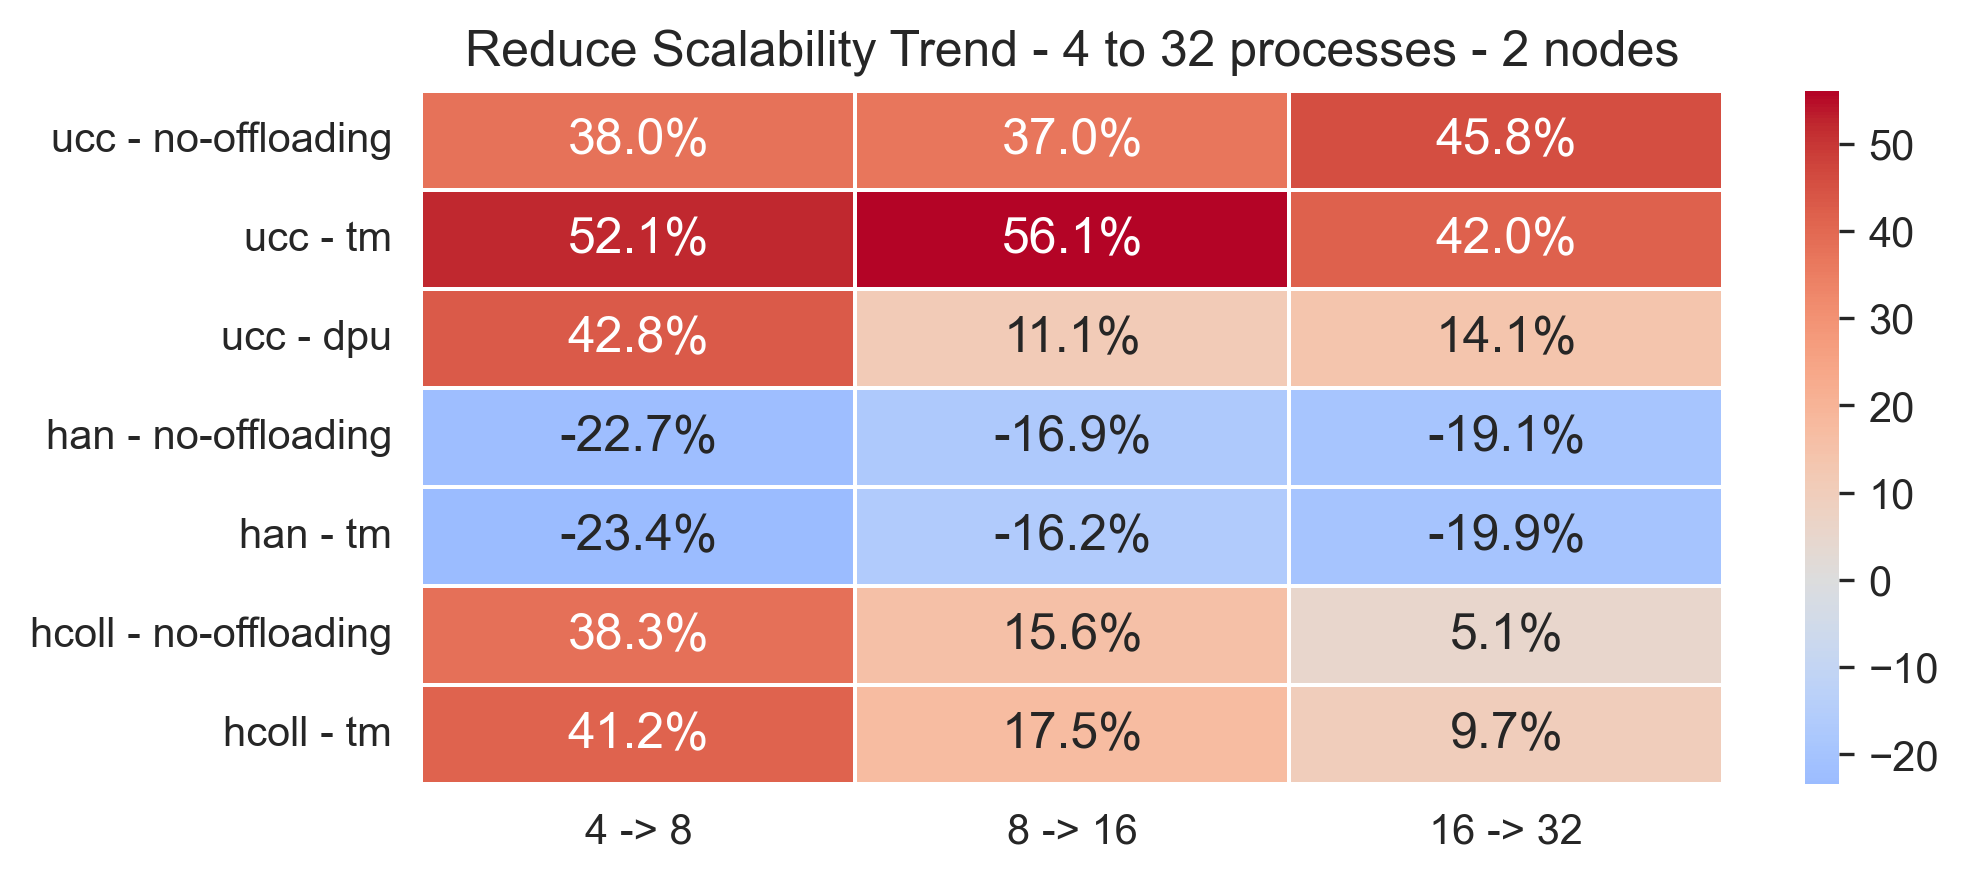

In [25]:
df = compute_scalability_trend('reduce', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=2, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Reduce Scalability Trend - 4 to 32 processes - 2 nodes')

HAN Scales best across the board in both cases. Bes for reduction!

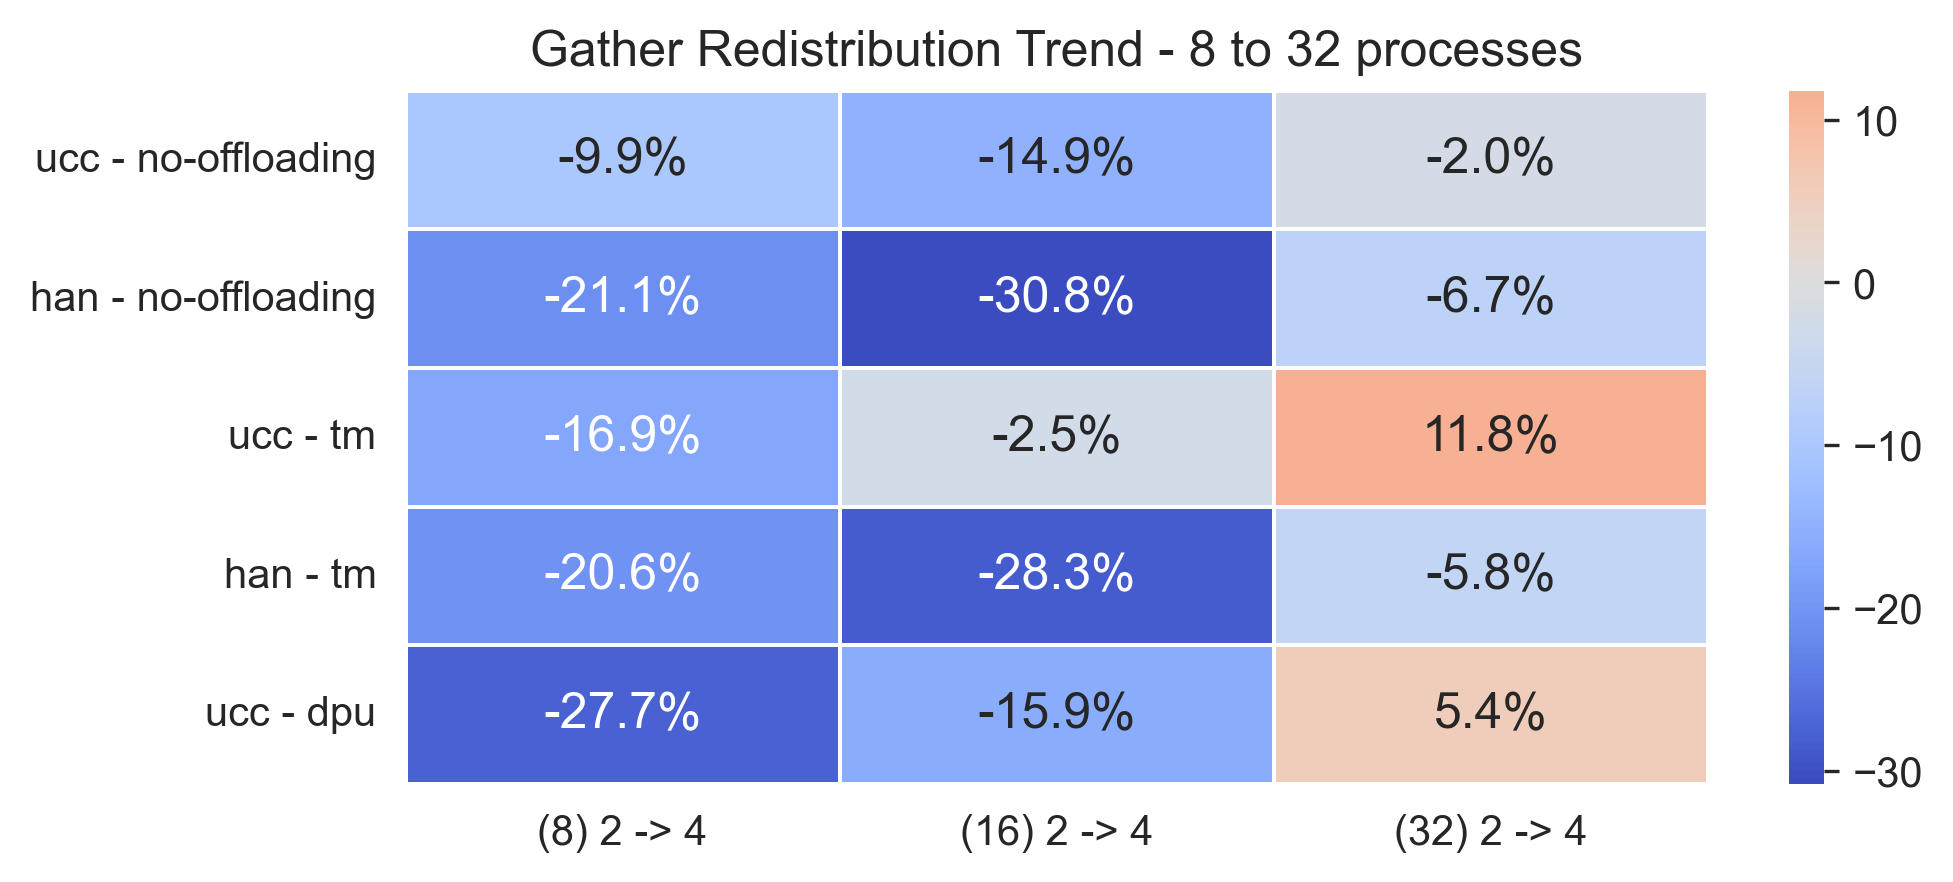

In [26]:
df = compute_redistribution_trend('gather', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes= [2, 4], nprocs=[8, 16, 32]) * 100
plot_heatmap(df, 'Gather Redistribution Trend - 8 to 32 processes')

There is a predominantly downward trend on the Gather redistribution. Offloading does not seem to be of much benefit, as HAN without it is the most scalable.

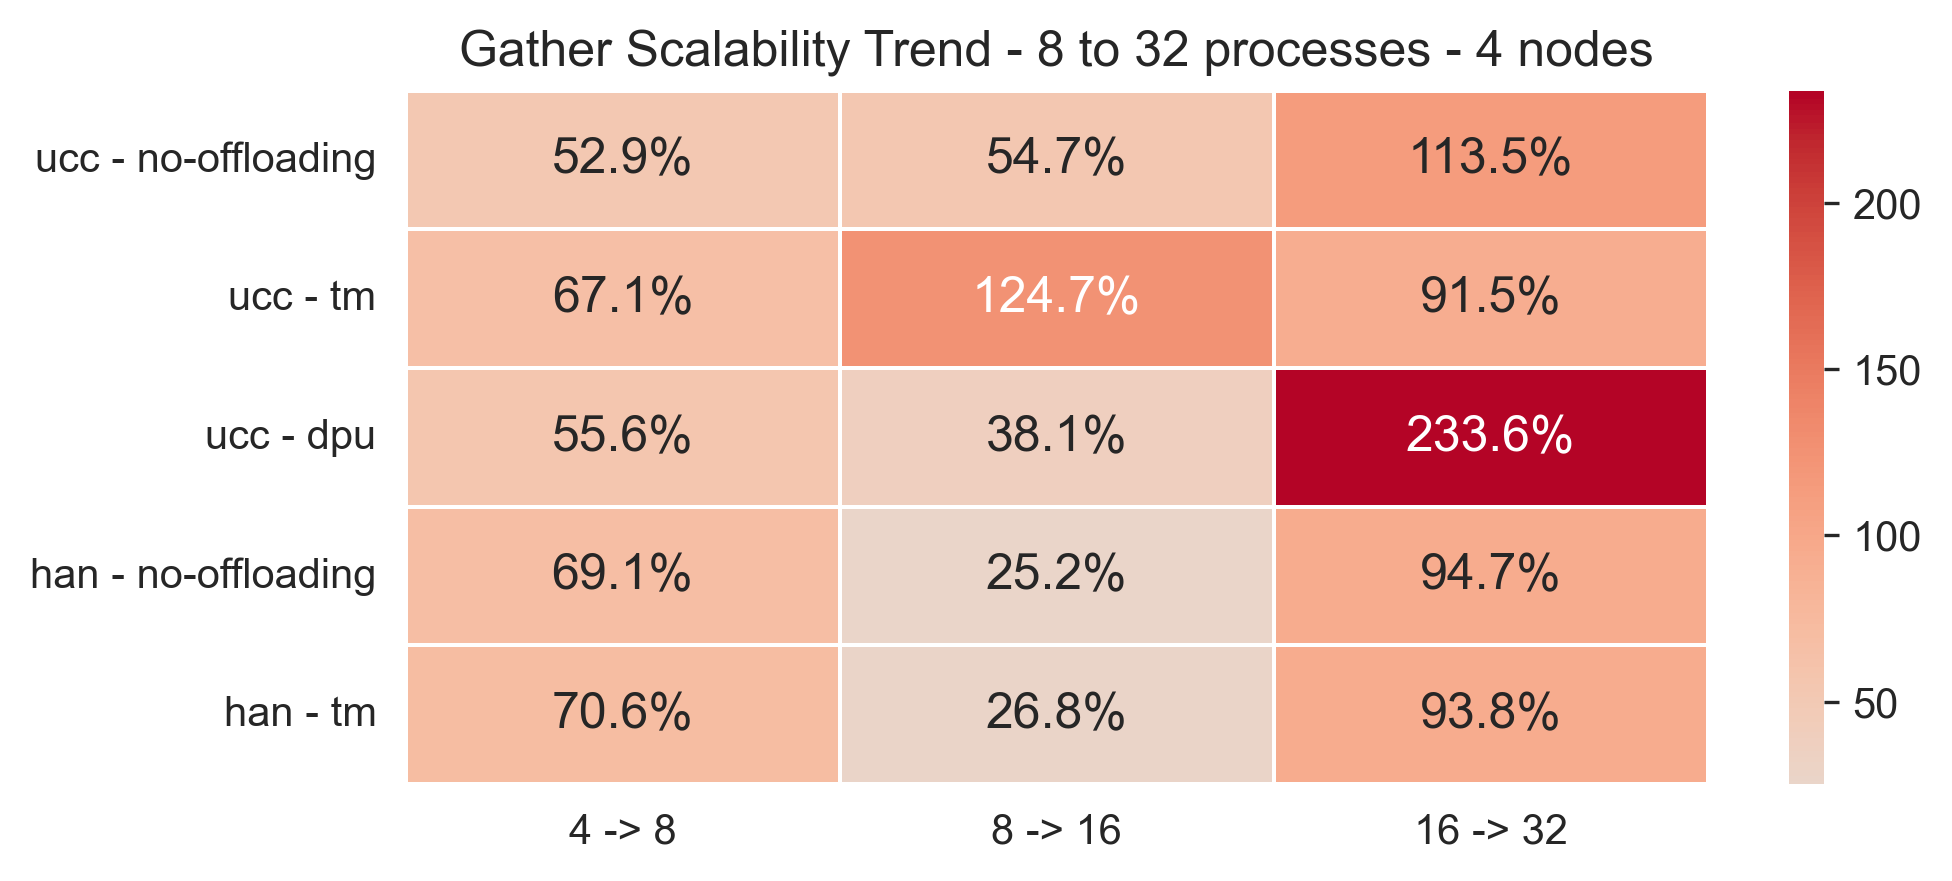

In [3]:
df = compute_scalability_trend('gather', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=4, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Gather Scalability Trend - 8 to 32 processes - 4 nodes')

Gather seems to scale fairly well across the board, altough the UCC DPU case seems to underperform in the 16 to 32 process increase.

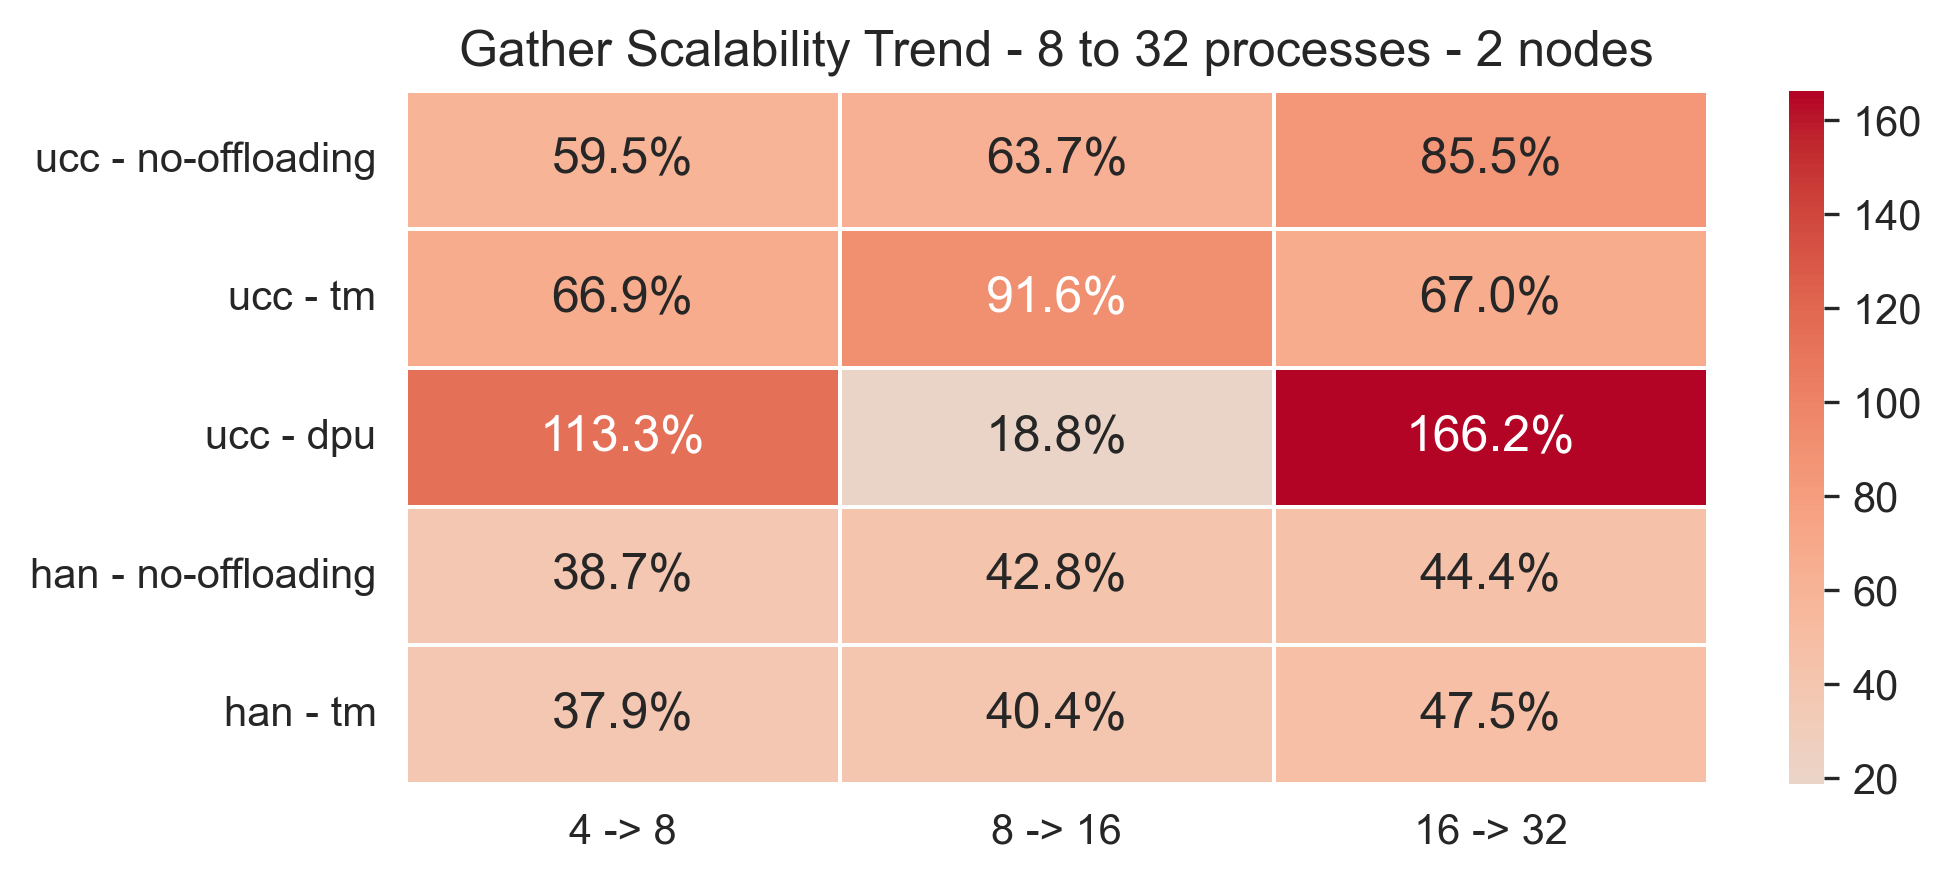

In [4]:
df = compute_scalability_trend('gather', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=2, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Gather Scalability Trend - 8 to 32 processes - 2 nodes')

Again, the DPU seems to underperform in terms of scalability adn exibits more fluctuation.

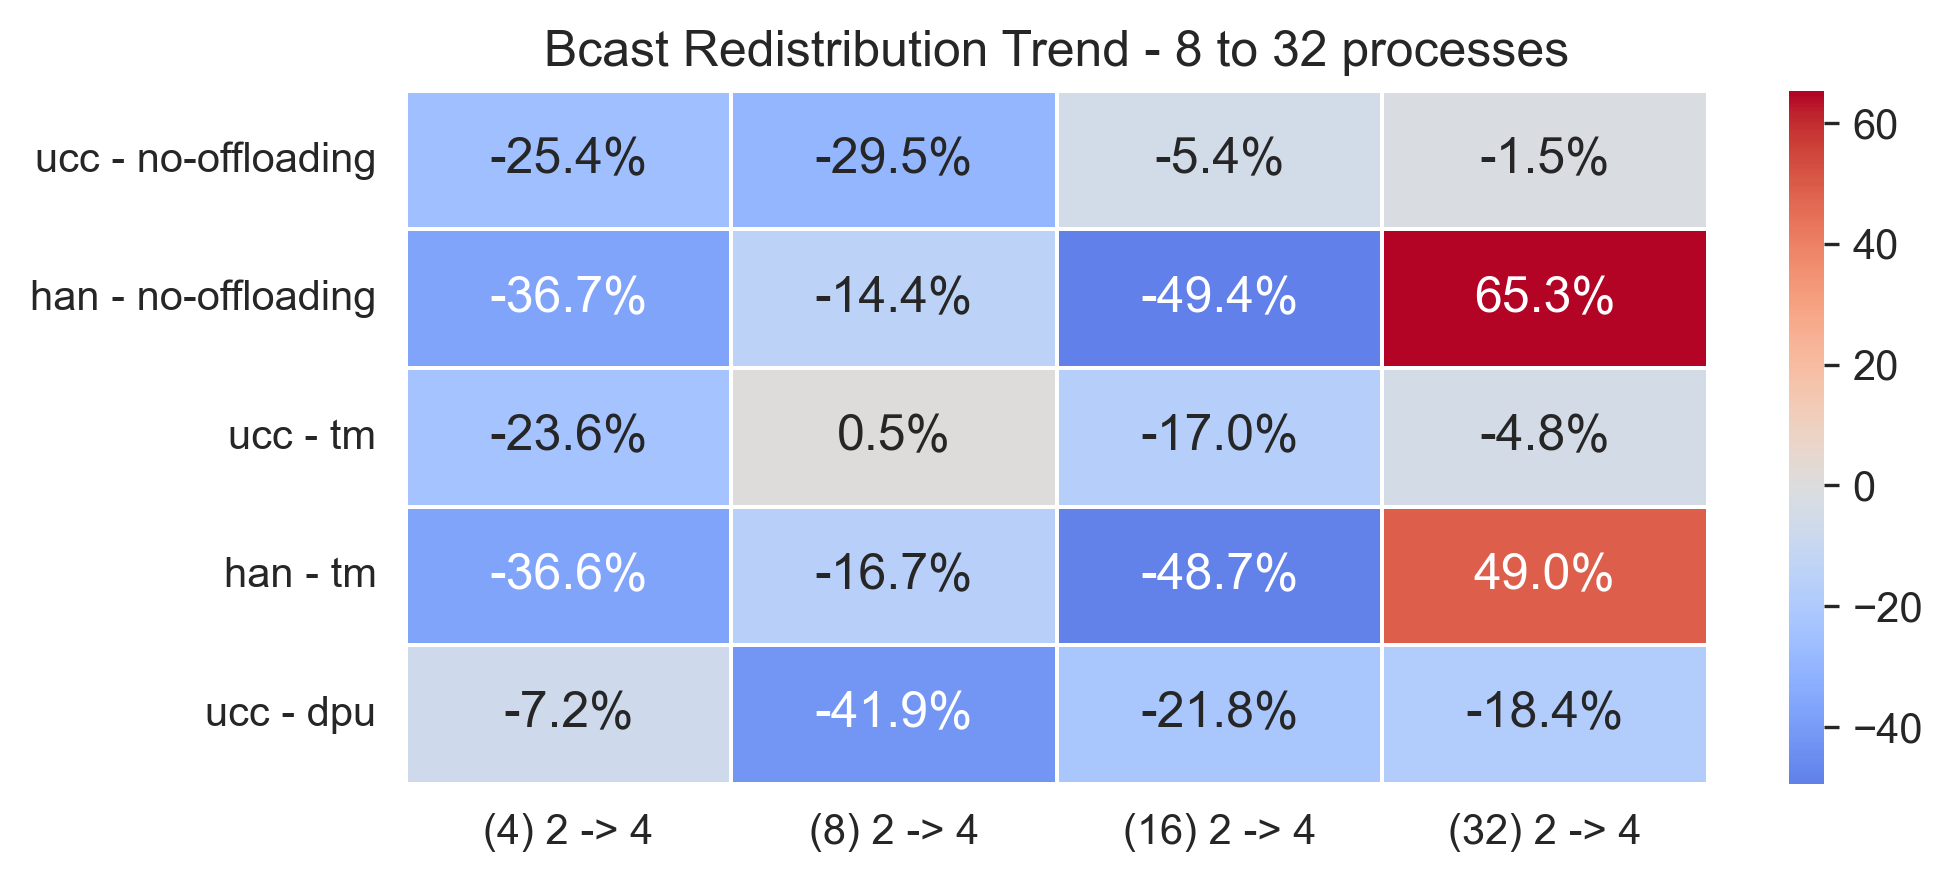

In [6]:
df = compute_redistribution_trend('Bcast', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes= [2, 4], nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Bcast Redistribution Trend - 8 to 32 processes')

Overall, there is a downward latency trend, with the DPU as the most reliable downward trend

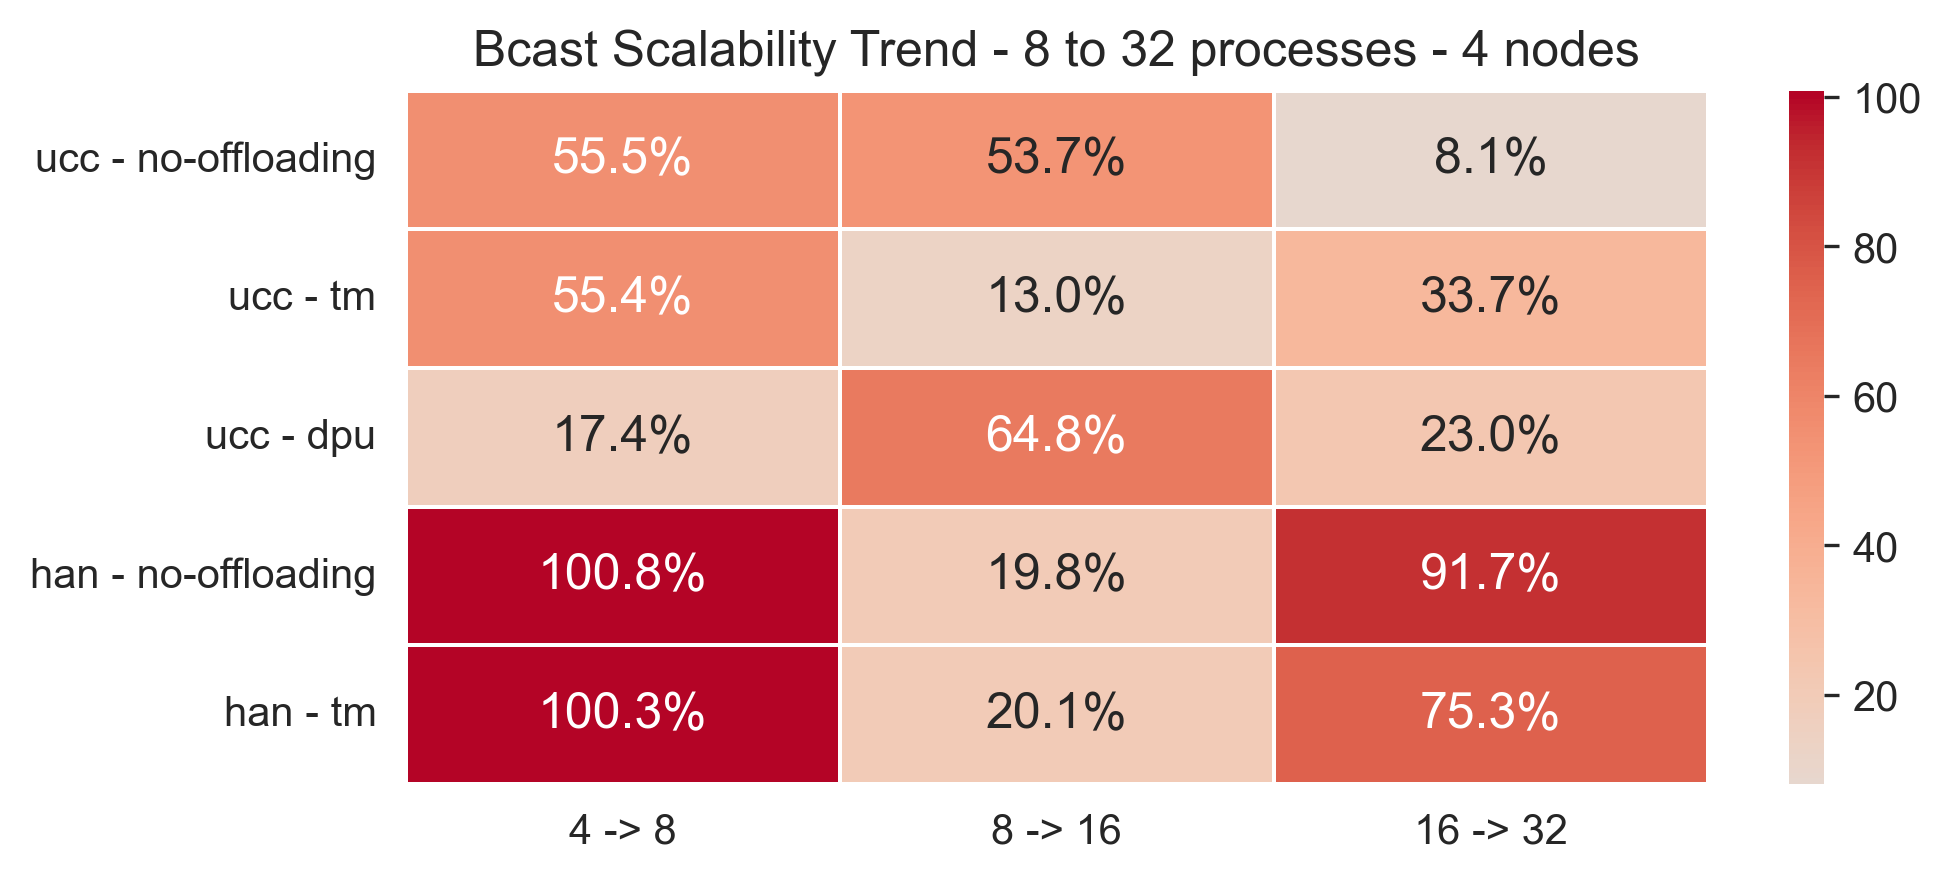

In [7]:
df = compute_scalability_trend('bcast', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=4, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Bcast Scalability Trend - 8 to 32 processes - 4 nodes')

UCC TM is shown to scale better than UCC without offloading, with the DPU scaling at a similar rate

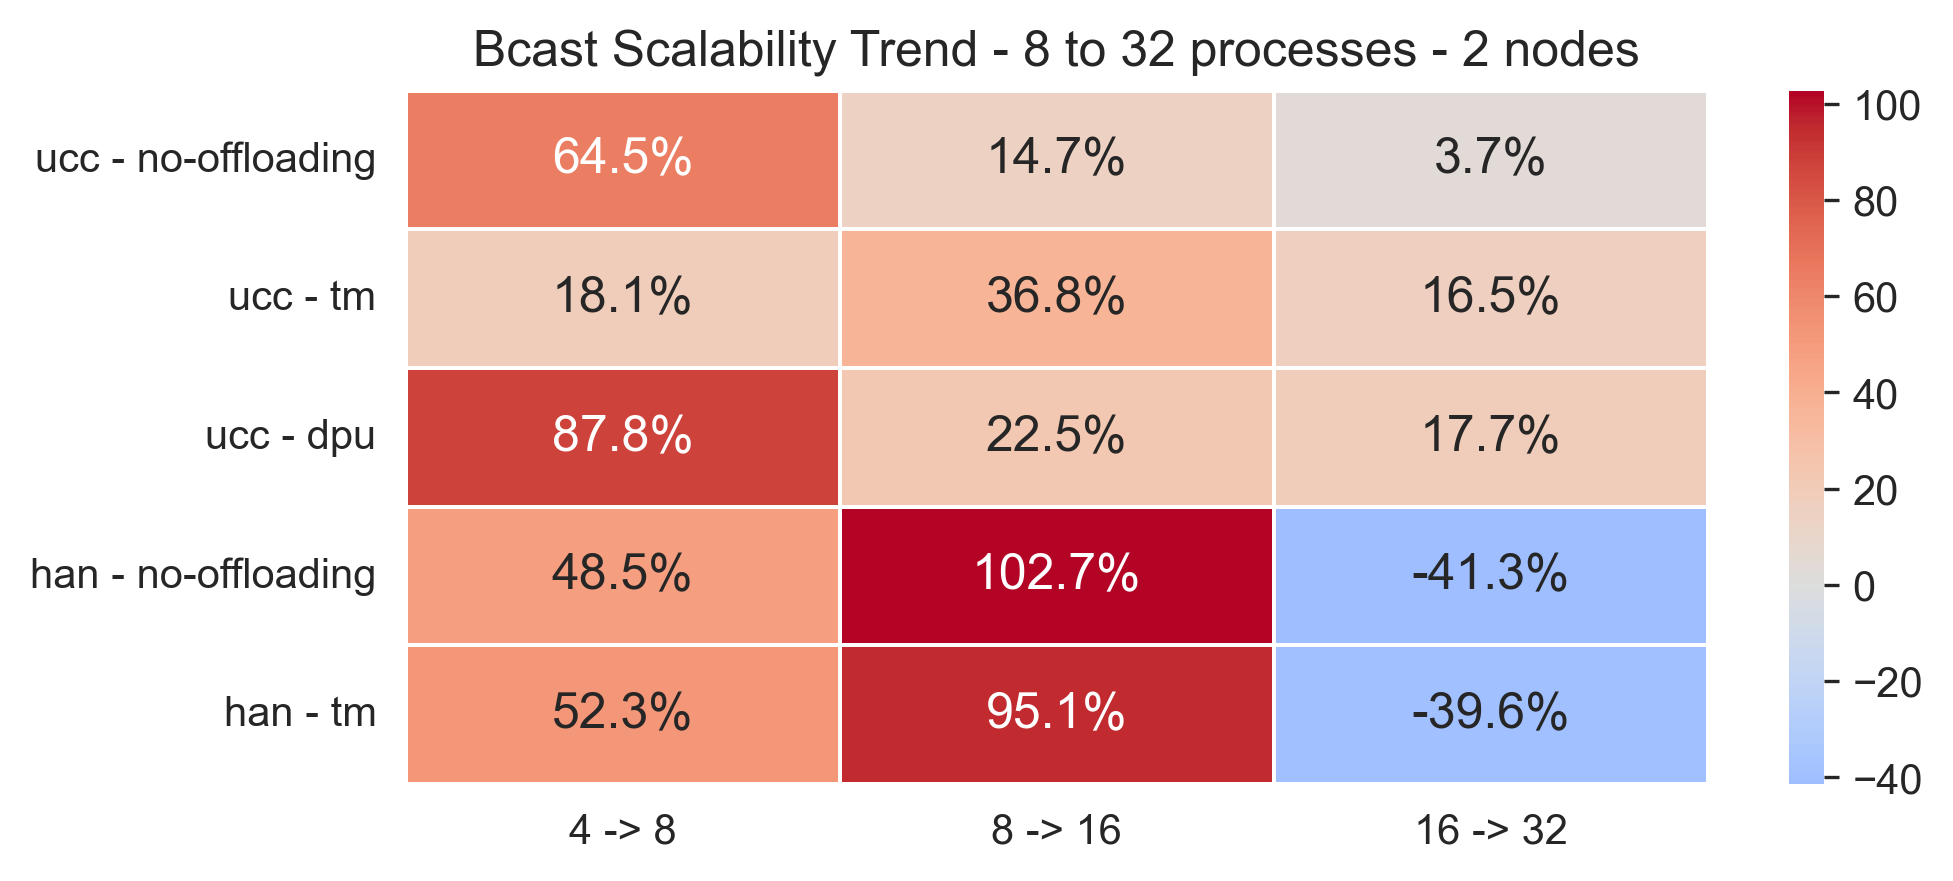

In [20]:
df = compute_scalability_trend('bcast', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=2, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Bcast Scalability Trend - 8 to 32 processes - 2 nodes')

UCC DPU does not scale as well as UCC TM. HAN Seems to take a hit at the 8 to 16 increase, which is reverted in the 16 to 32 case.

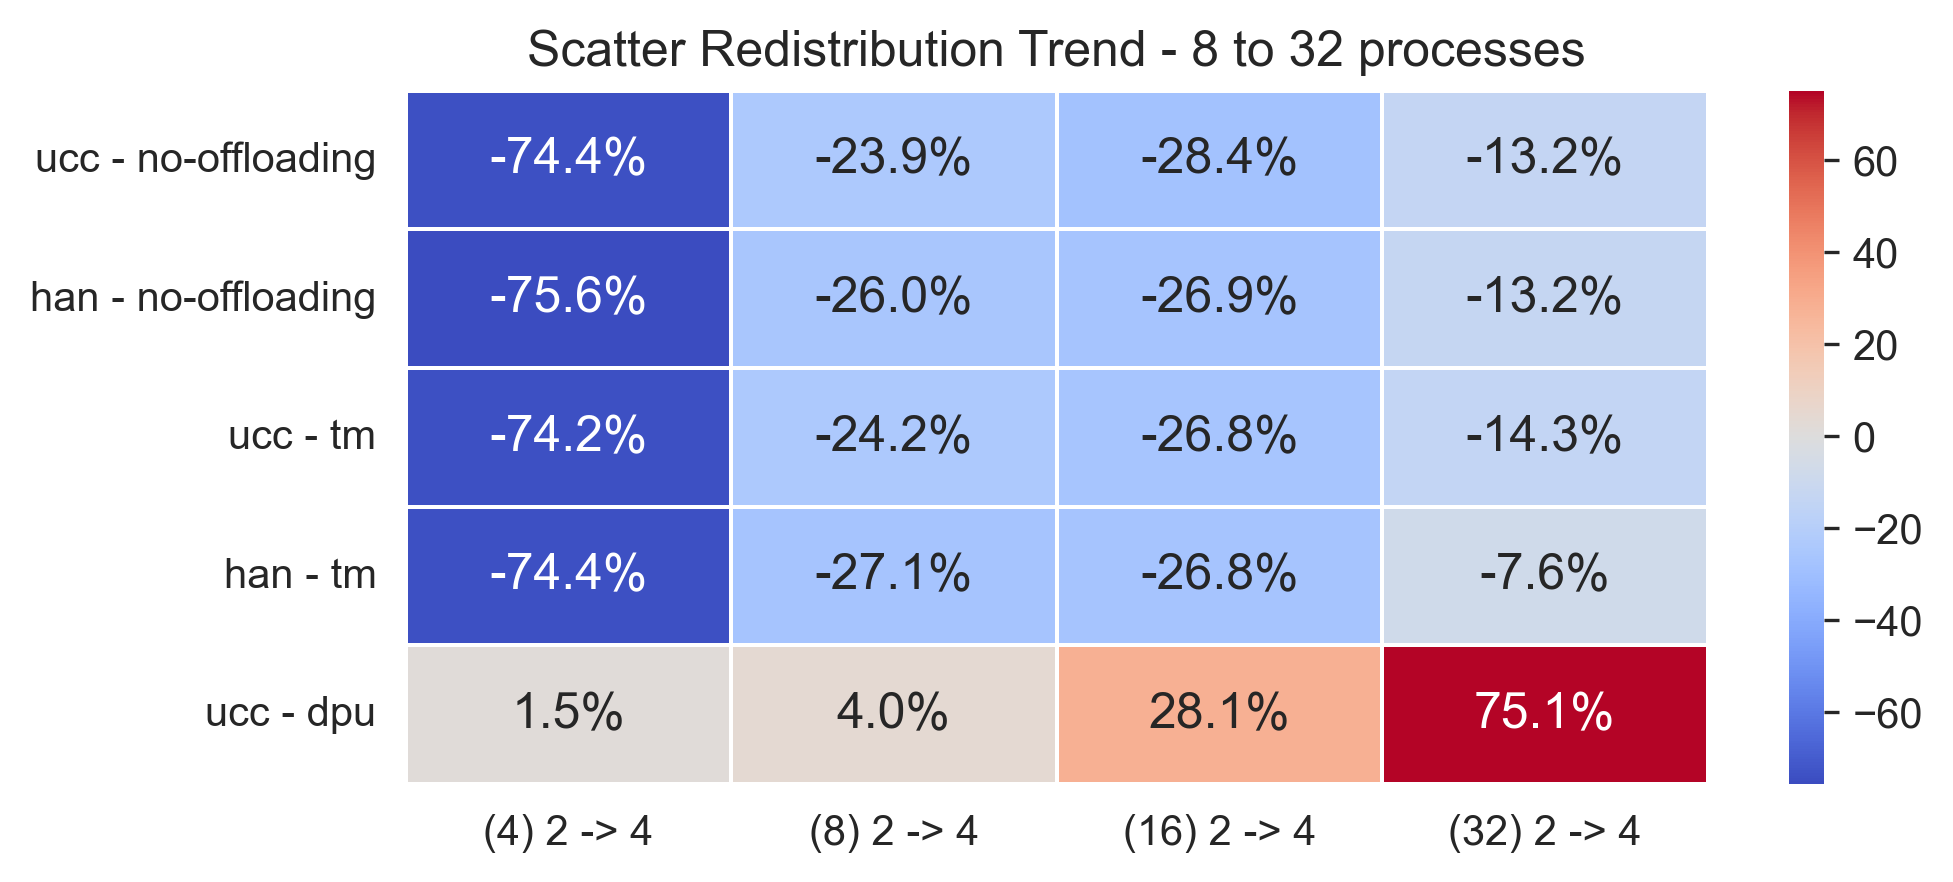

In [10]:
df = compute_redistribution_trend('Scatter', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes= [2, 4], nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Scatter Redistribution Trend - 8 to 32 processes')

In terms of redistribution, UCC DPU is shown to counter the downward trend exhibited across the other offloading modes. The relative increase is steady as the number of nodes is higher.

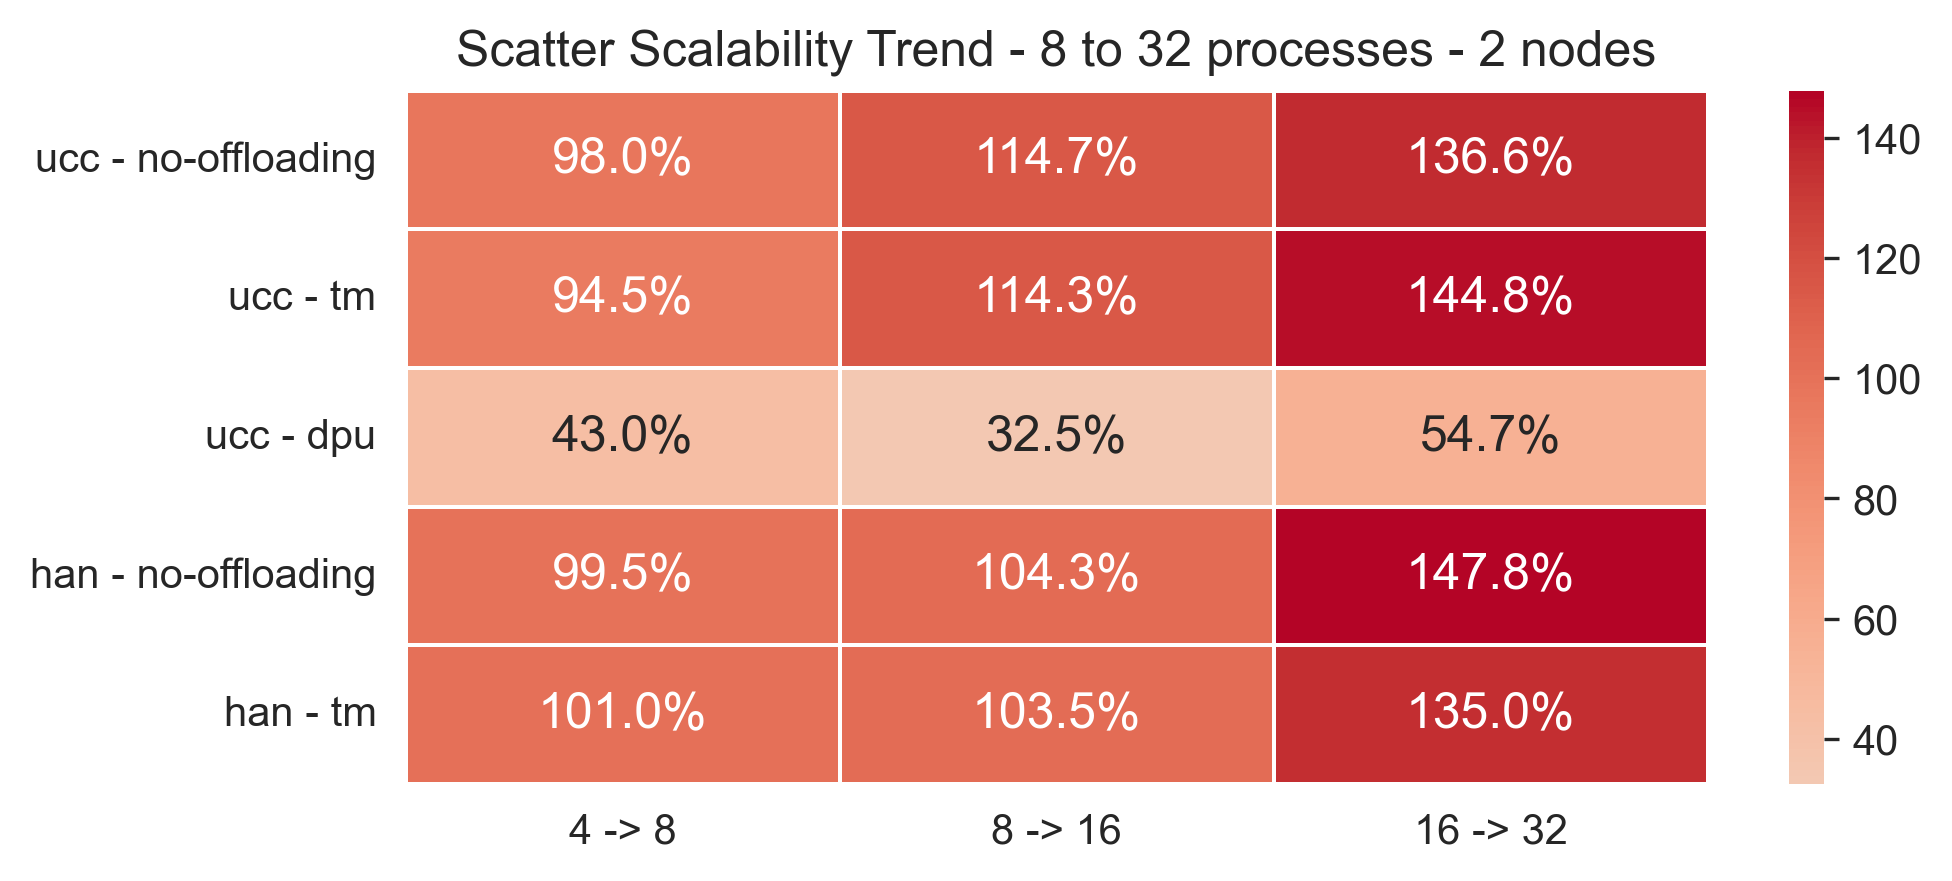

In [13]:
df = compute_scalability_trend('scatter', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=2, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Scatter Scalability Trend - 8 to 32 processes - 2 nodes')

There are several discernable patterns. On the one hand, all categories are shown to scale at the same rate.
UCC DPU undisputably scales better. Tag Matching does not help Scatter and makes marginal difference.

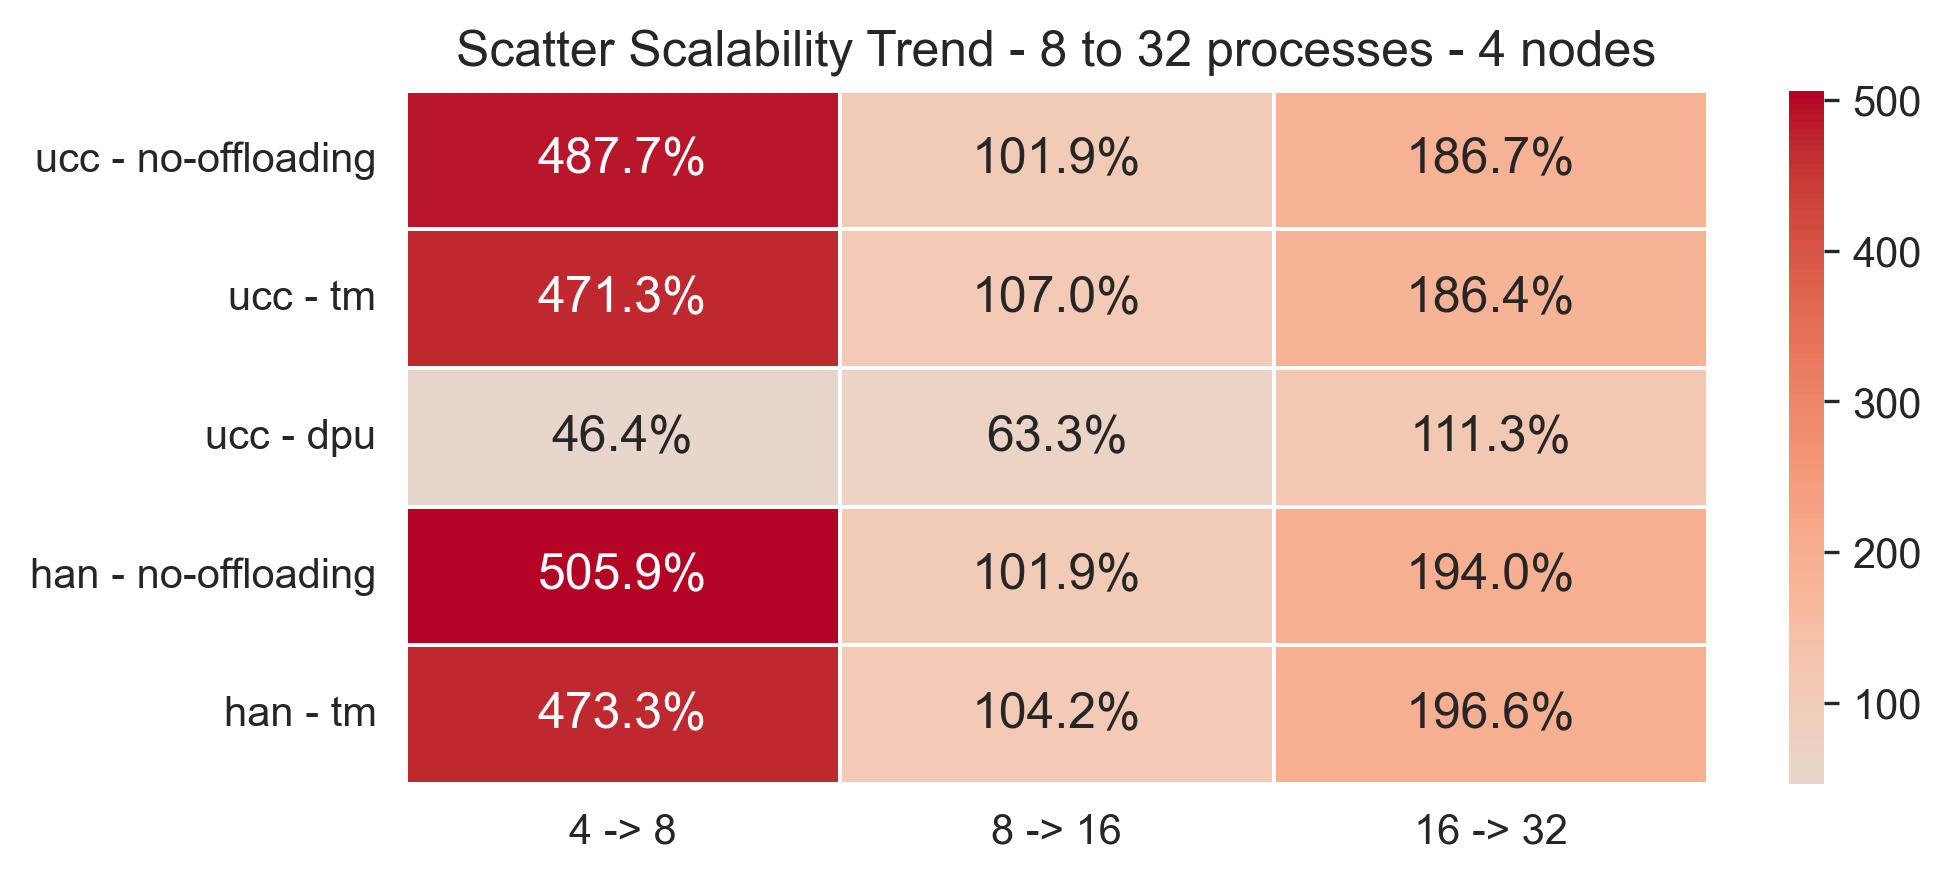

In [15]:
df = compute_scalability_trend('scatter', libs=['ucc', 'han', 'hcoll'], off_modes=['no-offloading', 'tm', 'dpu'], nodes=4, nprocs=[4, 8, 16, 32]) * 100
plot_heatmap(df, 'Scatter Scalability Trend - 8 to 32 processes - 4 nodes')

The Scatter operation is depicted as a tough collective to scale, reaching approcibately 5-times the incurred latency in a 4 to 8 process increase across non-DPU
modes. In contrast, the Service Process shows outstanding scalability when compared to the rest.